DS785 \- Capstone



In [44]:
# EXECUTE FIRST

# computational imports
import numpy as np
import pandas as pd

from scipy.optimize import minimize, minimize_scalar
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
import json


# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
# Load the dataset
df = pd.read_csv('DeploymentData.csv')

# Count number of records and variables in the dataset
print( 'Number of records (rows): {}'.format( df.shape[0] ) )
print( 'Number of variables (columns): {}'.format( df.shape[1] ) )

df.head()

Number of records (rows): 8829
Number of variables (columns): 20


,SN,PART_NUMBER,DESCRIPTION_,TYPE_OF_ASSET,PO,QTY,STORAGE_LOCATION,SITE_,STATUS,DATE RECEIVED,GOOD RECEIPT,STORY,RESERVED DATE,PROGRAM_NAME,PEL_REQUESTER,SBU,SHIP DATE,POC / DELIVERED TO,TRACKING NUMBER,SHIPPING ADDRESS
0,MXL2074C4G,4K0F1UT#ABA,HP Z2 MINI G5 WORKSTATION,WK-STATION,4202521524,1,PS-94 V 47 B,DALLAS,DELIVERED TO END USER,3/1/2022,5015843954,993,3/15/2022,2022 - MULTI PL SUSTAINMENT,SCOTT STARR,MULTI-BUSINESS UNIT,3/15/2022,RHETT MORRISON,NaN,Hand deliver to Rhett Morrison at NB
1,374615,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,4202499611,1,E04/G0325,EL SEGUNDO,PICKED UP,10/27/2021,5015259753,1445,6/27/2022,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,6/27/2022,GREG JOHNSON,PICKED UP,NaN
2,374592,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,4202499611,1,E04/G0325,EL SEGUNDO,PICKED UP,10/27/2021,5015259753,1445,6/27/2022,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,6/27/2022,GREG JOHNSON,PICKED UP,NaN
3,356553,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,4202499611,1,E04/G0325,EL SEGUNDO,PICKED UP,10/27/2021,5015259753,1445,6/27/2022,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,6/27/2022,GREG JOHNSON,PICKED UP,NaN
4,374628,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,4202499611,1,E04/G0325,EL SEGUNDO,PICKED UP,10/27/2021,5015259753,1445,6/27/2022,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,6/27/2022,GREG JOHNSON,PICKED UP,NaN


In [8]:
### Remove unnessary columns

df.drop(['SN', 'PO', 'STORAGE_LOCATION', 'SITE_', 'STATUS', 'DATE RECEIVED', 'GOOD RECEIPT', 'STORY', 'RESERVED DATE', 'POC / DELIVERED TO', 'TRACKING NUMBER', 'SHIPPING ADDRESS'], axis=1, inplace=True)


In [9]:
### Checking the number of rows and columns

# Count number of records and variables in the dataset
print( 'Updated number of records (rows): {}'.format( df.shape[0] ) )
print( 'Updated number of variables (columns): {}'.format( df.shape[1] ) )

df.head()

Updated number of records (rows): 8829
Updated number of variables (columns): 8


,PART_NUMBER,DESCRIPTION_,TYPE_OF_ASSET,QTY,PROGRAM_NAME,PEL_REQUESTER,SBU,SHIP DATE
0,4K0F1UT#ABA,HP Z2 MINI G5 WORKSTATION,WK-STATION,1,2022 - MULTI PL SUSTAINMENT,SCOTT STARR,MULTI-BUSINESS UNIT,3/15/2022
1,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,1,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,6/27/2022
2,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,1,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,6/27/2022
3,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,1,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,6/27/2022
4,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,1,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,6/27/2022


In [10]:
# Check the variable type

df.dtypes

# Determine if the variable is numerical and categorical 
numerical_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Variables:")
print(numerical_vars)
print("\nCategorical Variables:")
print(categorical_vars)

Numerical Variables:
['QTY']

Categorical Variables:
['PART_NUMBER', 'DESCRIPTION_', 'TYPE_OF_ASSET', 'PROGRAM_NAME', 'PEL_REQUESTER', 'SBU', 'SHIP DATE']


In [11]:
# Summary the dataset

df.describe()

,QTY
count,8829.000000
mean,1.042700
std,0.778833
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,36.000000


In [12]:
### COnvert "Ship Date" to Date type

import datetime as dt      

df['SHIP DATE']=pd.to_datetime(df['SHIP DATE'],)

df.head()

,PART_NUMBER,DESCRIPTION_,TYPE_OF_ASSET,QTY,PROGRAM_NAME,PEL_REQUESTER,SBU,SHIP DATE
0,4K0F1UT#ABA,HP Z2 MINI G5 WORKSTATION,WK-STATION,1,2022 - MULTI PL SUSTAINMENT,SCOTT STARR,MULTI-BUSINESS UNIT,2022-03-15
1,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,1,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,2022-06-27
2,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,1,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,2022-06-27
3,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,1,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,2022-06-27
4,J179,ConvergeOne / J179 IP PHONE NO PWR SUPP GSA,PHONE - TSG,1,CLASSIFIED AREAS PHONES,SHARON ASHKENAZI,MULTI-BUSINESS UNIT,2022-06-27


#### **Dealing with missing data**



In [13]:
### Data Cleaning

#checking for the duplicated data
#df.duplicated().sum()

#Checking missing values
df.isna().sum() #isna() is a buildin function to check the missing values present in the dataset's festures

PART_NUMBER        0
DESCRIPTION_       0
TYPE_OF_ASSET      0
QTY                0
PROGRAM_NAME      31
PEL_REQUESTER    138
SBU               33
SHIP DATE        399
dtype: int64

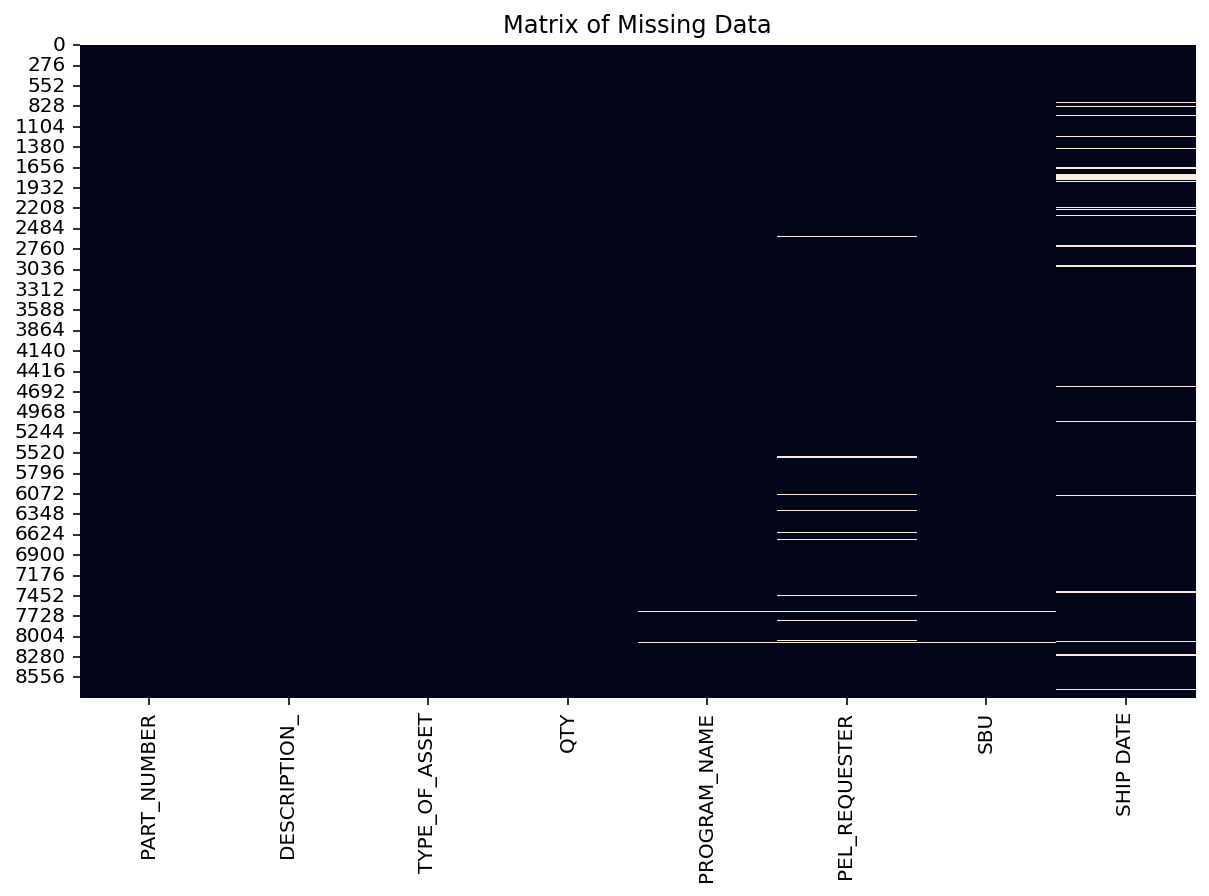

In [14]:
# Creating the matrix of missing value

import seaborn as sns
import matplotlib.pyplot as plt

# Create a matrix of missing data
missing_data_matrix = df.isna()
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data_matrix, cbar=False)
plt.title('Matrix of Missing Data')
plt.show()

In [15]:
# Dealing with missing data

##PROGRAM_NAME: Replace missing values with the mode (most frequent value):
df['PROGRAM_NAME'].fillna(df['PROGRAM_NAME'].mode()[0], inplace=True)

##PEL_REQUESTER: Replace missing values with the mode:
df['PEL_REQUESTER'].fillna(df['PEL_REQUESTER'].mode()[0], inplace=True)

##SBU: Replace missing values with the mode:
df['SBU'].fillna(df['SBU'].mode()[0], inplace=True)



In [16]:
##SHIP DATE: Replace missing values with the mean:
#df['SHIP DATE'].fillna(df['SHIP DATE'].mean(), inplace=True)

##SHIP DATE: To use time-based interpolation techniques for estimating missing values in theIP_DATE variable, you can use the following code:
# Convert SHIP_DATE column to datetime format
df['SHIP DATE'] = pd.to_datetime(df['SHIP DATE'])

# Sort the dataframe by Ship Date
df = df.sort_values('SHIP DATE')

# Interpolate missing values using either "pad" or "backfill" method
df['SHIP DATE'] = df['SHIP DATE'].interpolate(method='pad')

# Convert SHIP_DATE column back to string format if needed
#df['SHIP DATE'] = df['SHIP DATE'].dt.strftime('%Y-%m-%d')

# Check for any remaining missing values
df['SHIP DATE'].isna().sum()

0

In [17]:
#Checking missing values again
df.isna().sum()

PART_NUMBER      0
DESCRIPTION_     0
TYPE_OF_ASSET    0
QTY              0
PROGRAM_NAME     0
PEL_REQUESTER    0
SBU              0
SHIP DATE        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8829 entries, 7469 to 8744
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PART_NUMBER    8829 non-null   object        
 1   DESCRIPTION_   8829 non-null   object        
 2   TYPE_OF_ASSET  8829 non-null   object        
 3   QTY            8829 non-null   int64         
 4   PROGRAM_NAME   8829 non-null   object        
 5   PEL_REQUESTER  8829 non-null   object        
 6   SBU            8829 non-null   object        
 7   SHIP DATE      8829 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 620.8+ KB


# Data Analysis



#### Dealing with Outliers



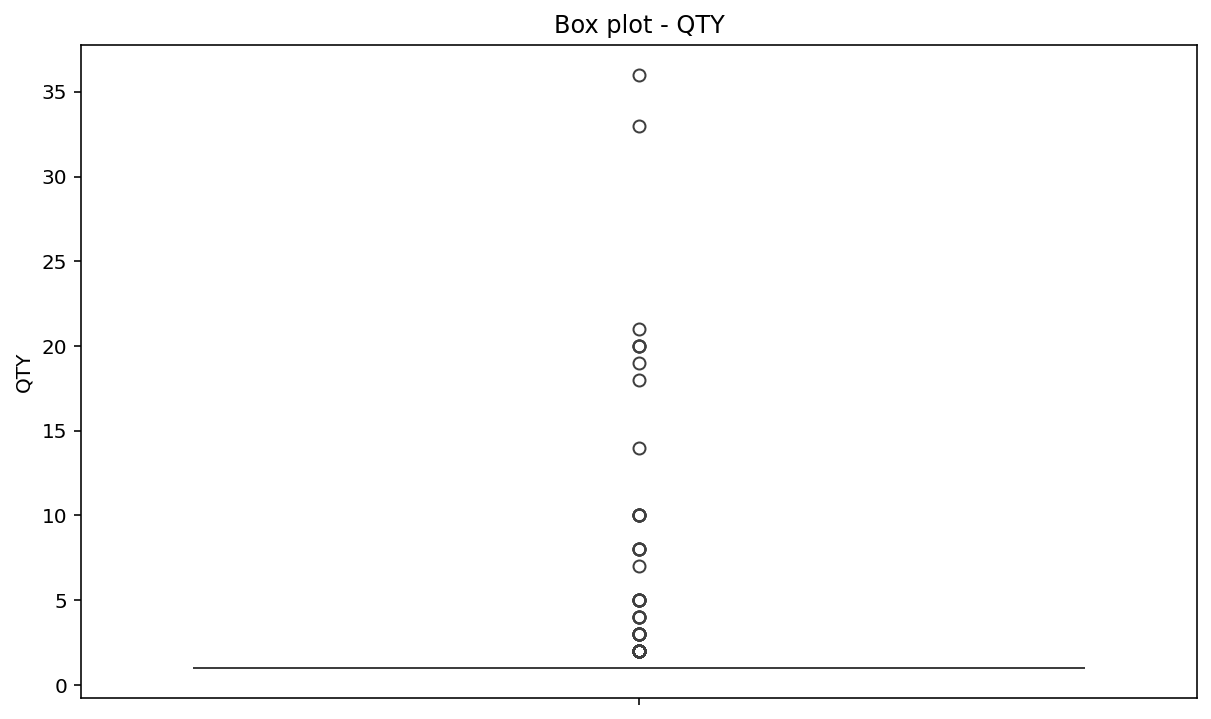

In [19]:
### Checking for outliners

# Create box plots for the numerical variables
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=var)
    plt.title(f'Box plot - {var}')
    plt.show()

In [20]:
### Using the interquartile range (IQR) and quartile values (Q1, Q3) to determine the lowest limit for a value to be considered an outlier

import numpy as np

# Calculate the quartile values (Q1 and Q3)
Q1 = np.percentile(df['QTY'], 25)
Q3 = np.percentile(df['QTY'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper limit for outlier detection
lower_limit = Q1 - (1.5 * IQR)
#lower_limit

upper_limit = Q3 + (1.5 * IQR)


# Create a DataFrame with the quartile values and IQR
quartiles = {
    'Q1': [Q1],
    'Q3': [Q3],
    'IQR': [IQR],
    'lowest_limit': [lower_limit],
    'upper_limit': [upper_limit]
}
df_quartiles = pd.DataFrame(quartiles)

# Display the DataFrame
df_quartiles

,Q1,Q3,IQR,lowest_limit,upper_limit
0,1.0,1.0,0.0,1.0,1.0


In [21]:
### Replacing outliers with lower and upper limit
#Dealing with outliers by calculating he quartile values (Q1 and Q3) and the interquartile range (IQR) for the 'QTY' column in the df dataset. It then determines the lower and upper limits for outlier detection using the IQR. Any values below the lower limit or above the upper limit are replaced with the respective limit value.

# Calculate the quartile values (Q1 and Q3)
Q1 = np.percentile(df['QTY'], 25)
Q3 = np.percentile(df['QTY'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper limits for outlier detection
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

# Replace outliers with the upper or lower limit
df['QTY'] = np.where(df['QTY'] < lower_limit, lower_limit, df['QTY'])
df['QTY'] = np.where(df['QTY'] > upper_limit, upper_limit, df['QTY'])

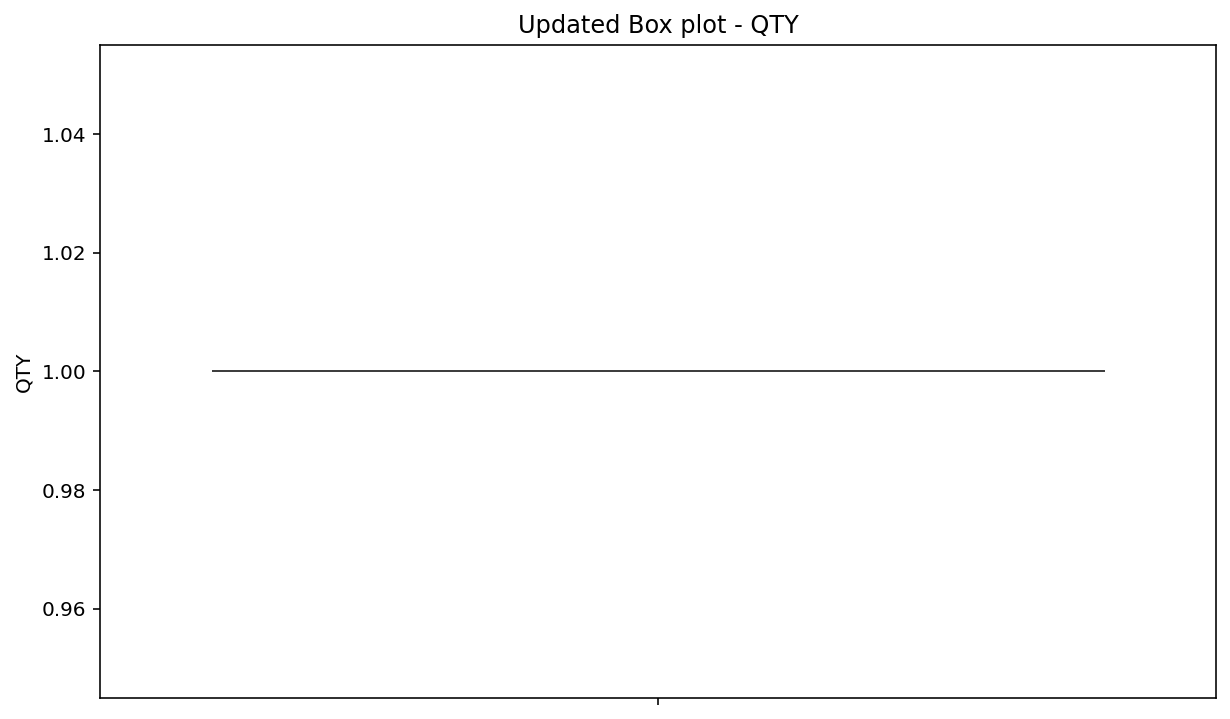

In [22]:
### Checking for outliners after replacing outliers with lower and upper limit again

# Create box plots for the numerical variables
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=var)
    plt.title(f'Updated Box plot - {var}')
    plt.show()

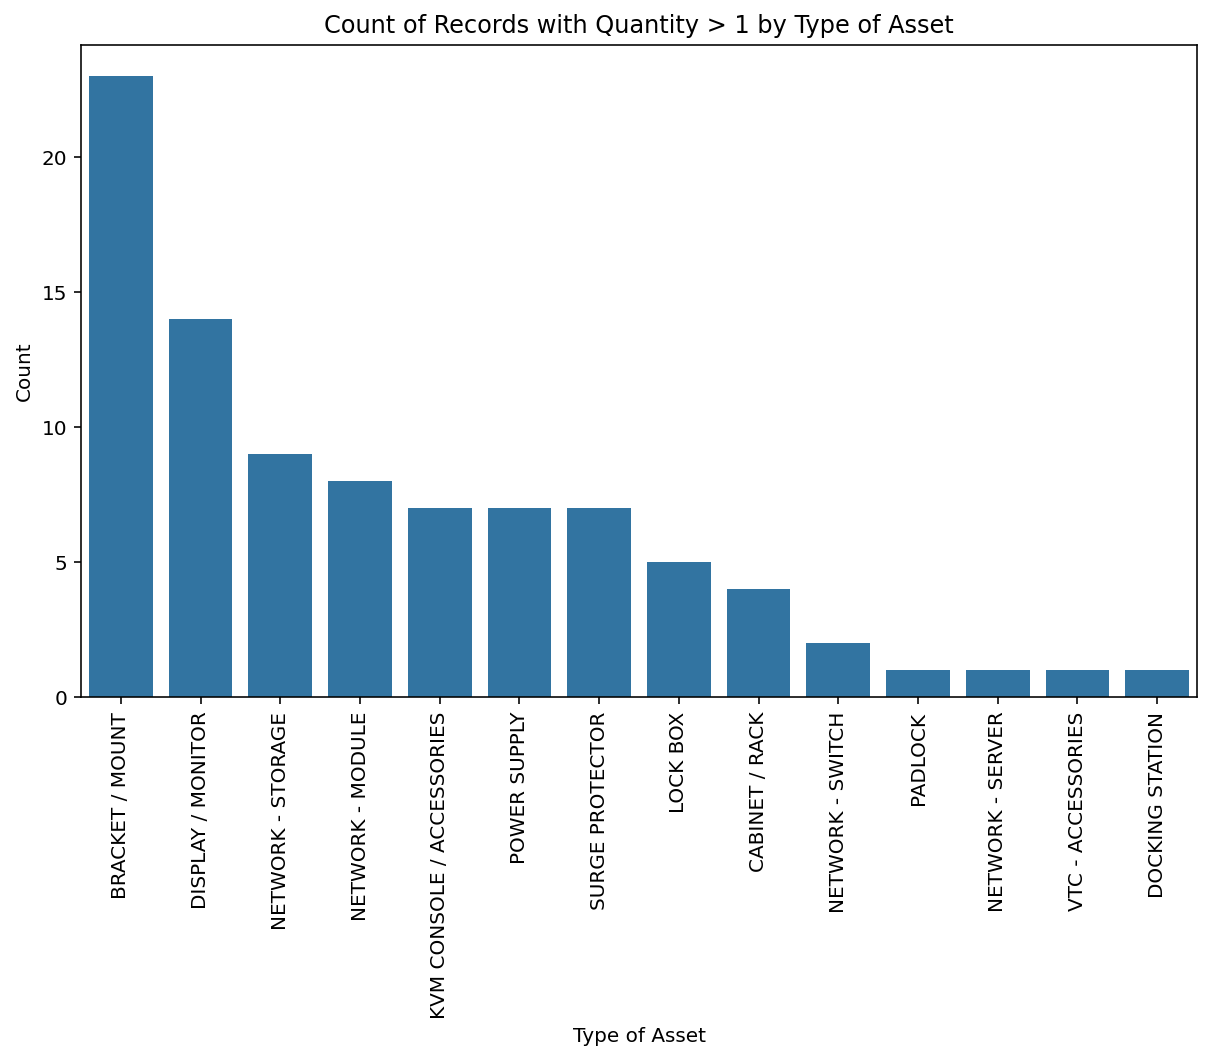

In [23]:
### Run this code to show the total records that was deployed in a quantity greater than 1 by type of assets

# Load the dataset
df_test = pd.read_csv('DeploymentData.csv')

# Filter the dataset for records with quantity greater than 1
df_greater_than_1 = df_test[df_test['QTY'] > 1]

# Count the records by type of assets
count_by_type_of_asset = df_greater_than_1['TYPE_OF_ASSET'].value_counts()

# Plot the count
plt.figure(figsize=(10, 6))
sns.barplot(x=count_by_type_of_asset.index, y=count_by_type_of_asset.values)
plt.xlabel('Type of Asset')
plt.ylabel('Count')
plt.title('Count of Records with Quantity > 1 by Type of Asset')
plt.xticks(rotation=90)
plt.show()

### **Handling Bias**



#### Handling Bias: Part Number and Type of Assets



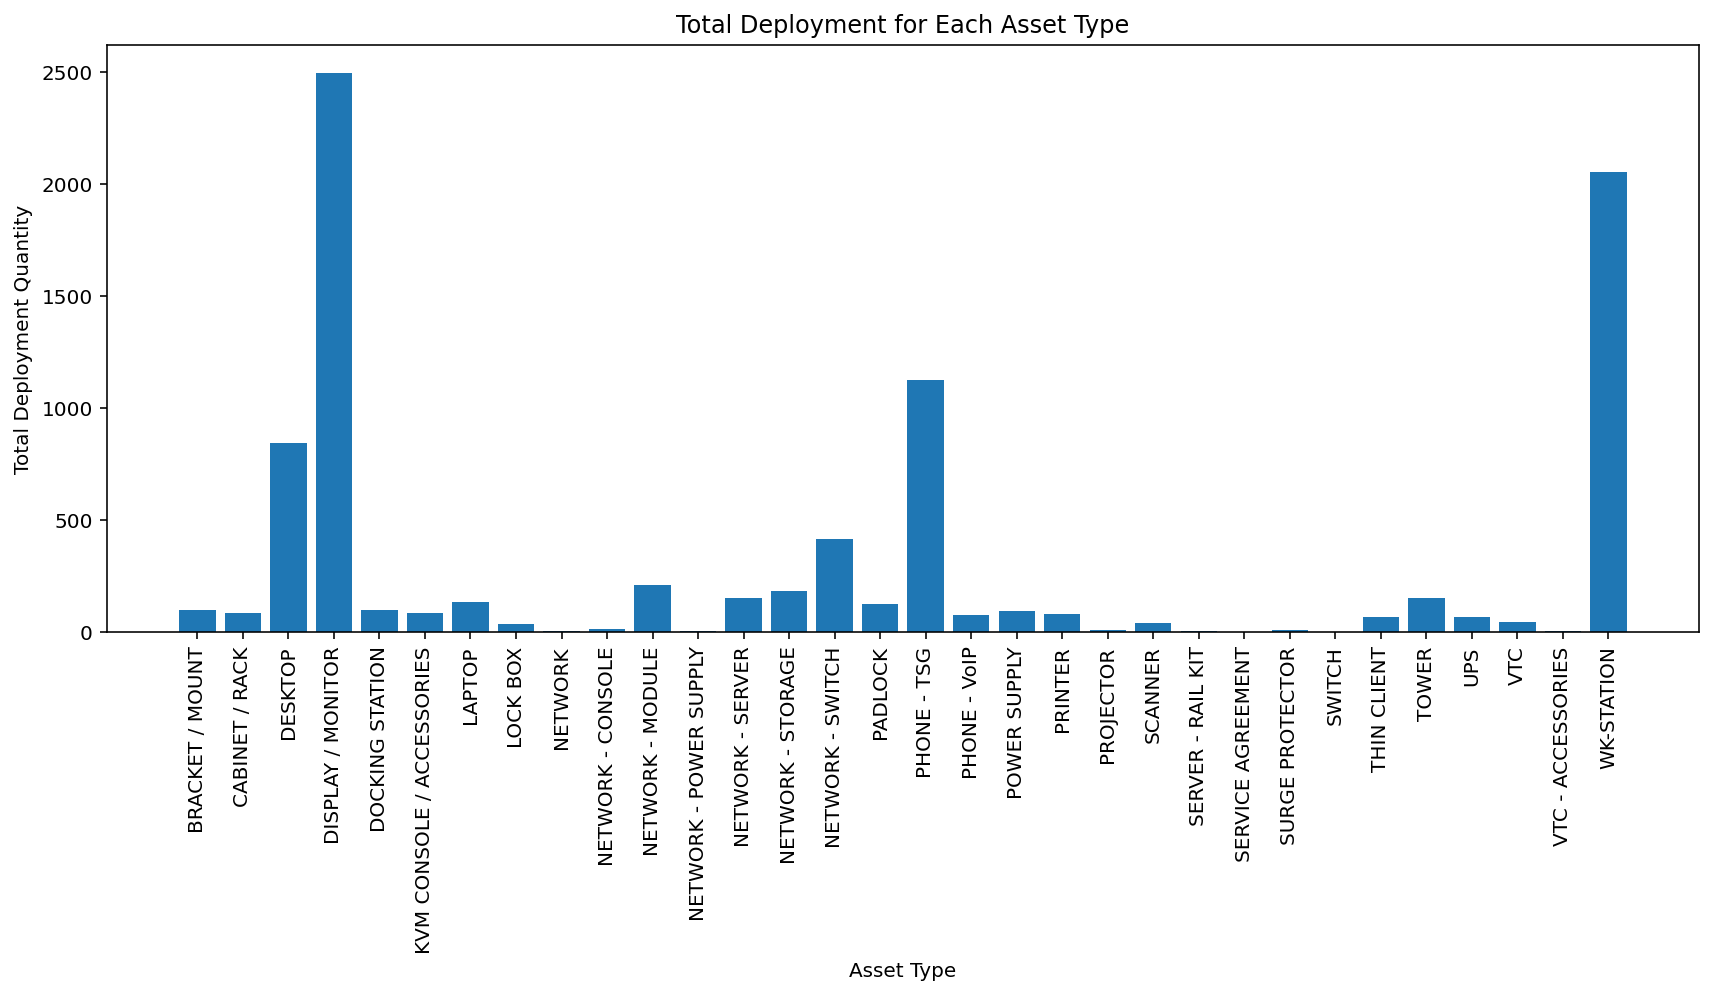

In [24]:
### Plot to show total deployment quantity for each type of asset

import matplotlib.pyplot as plt
import pandas as pd

# Group the data by asset type and calculate the total deployment quantity
grouped = df.groupby('TYPE_OF_ASSET')['QTY'].sum().reset_index()

# Plotting the total deployment quantity for each asset type
plt.bar(grouped['TYPE_OF_ASSET'], grouped['QTY'])

# Add labels and title to the plot
plt.xlabel('Asset Type')
plt.ylabel('Total Deployment Quantity')
plt.title('Total Deployment for Each Asset Type')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Automatically adjust the layout to fit the x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

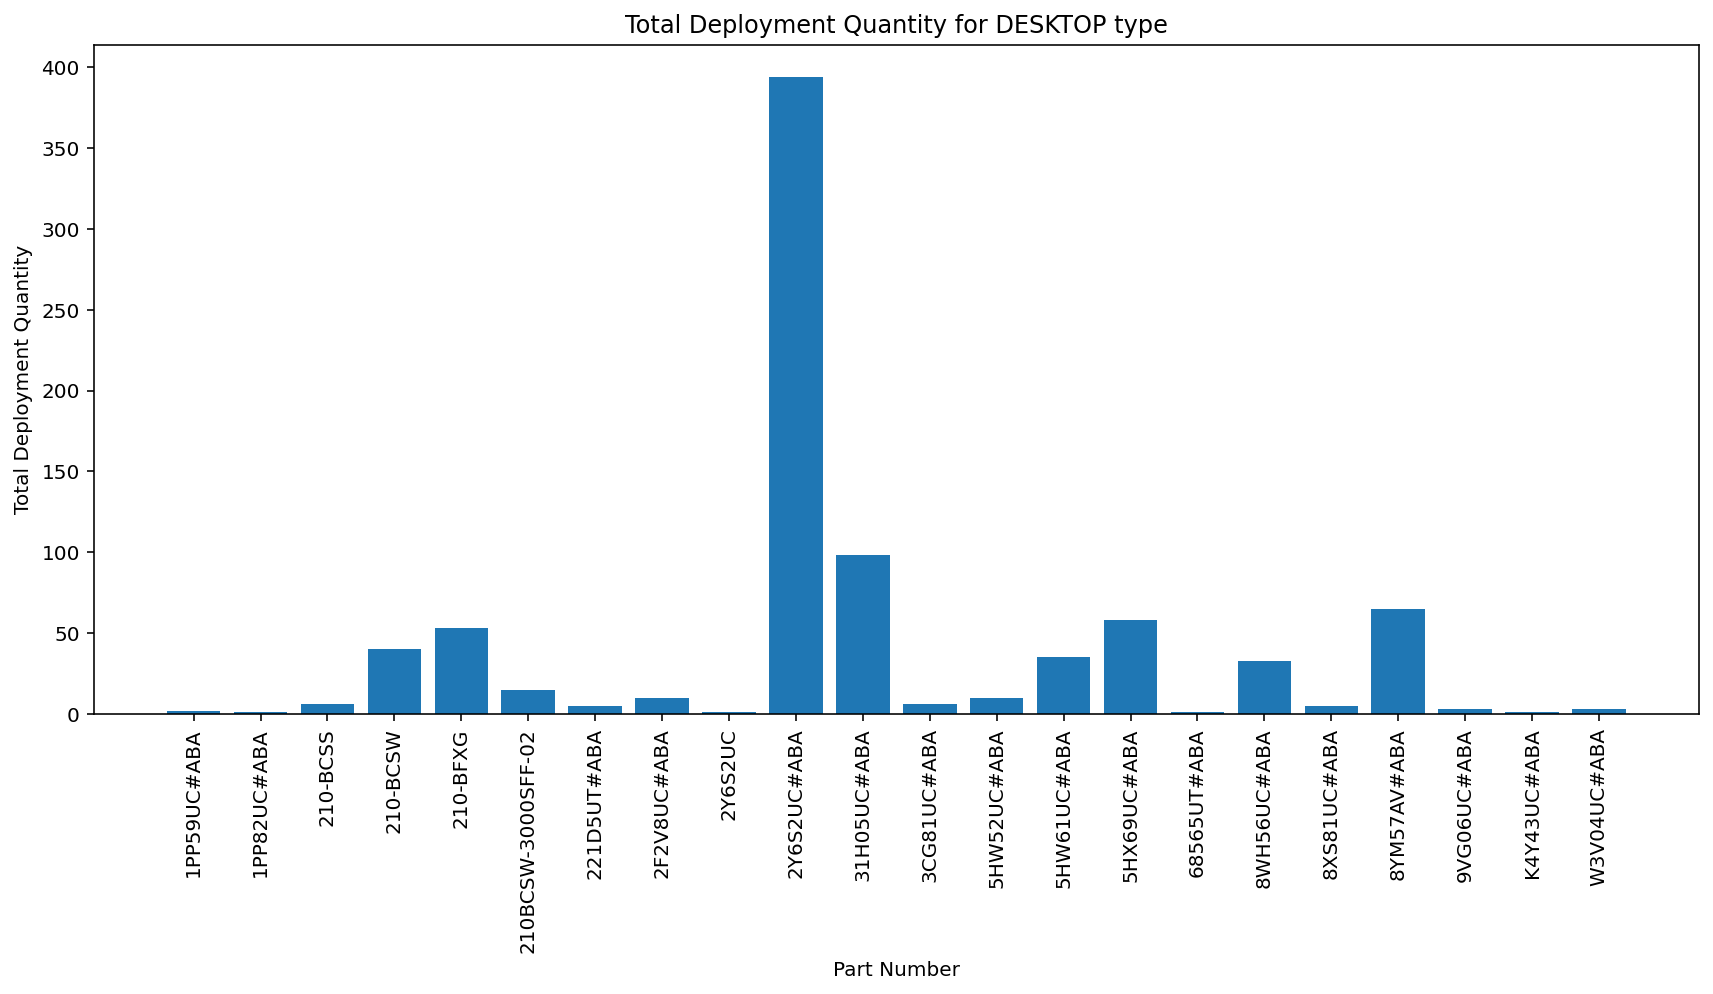

In [21]:
#before grouping by PART_NUMBER

### Plot to show total deployment quantity for certain type of asset by part number 

import pandas as pd
import matplotlib.pyplot as plt


# Filter the data for asset type 'DESKTOP'
filtered_df = df[df['TYPE_OF_ASSET'] == 'DESKTOP']

# Group the filtered data by part number and calculate total deployment quantity
grouped = filtered_df.groupby('PART_NUMBER')['QTY'].sum().reset_index()

# Plotting the total deployment quantity for each part number
plt.bar(grouped['PART_NUMBER'], grouped['QTY'])

# Add labels and title to the plot
plt.xlabel('Part Number')
plt.ylabel('Total Deployment Quantity')
plt.title('Total Deployment Quantity for DESKTOP type')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Automatically adjust the layout to fit the x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

#### Handling Bias: Ship date



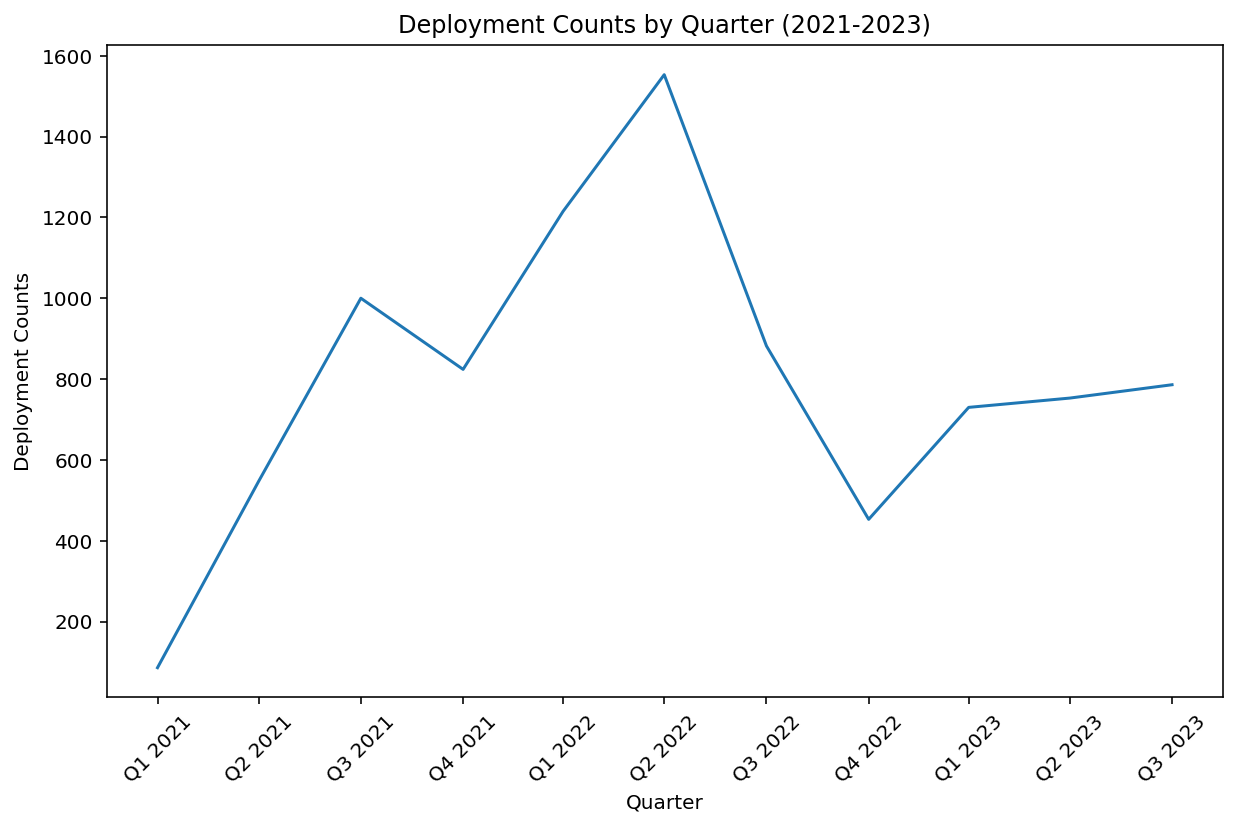

In [25]:
### Plot to show deployment counts by quarters for all assets

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_1 = df.copy()

# Convert SHIP DATE column to datetime format
df_1['SHIP DATE1'] = pd.to_datetime(df_1['SHIP DATE'])


# Set the SHIP DATE column as the index
df_1 = df_1.set_index('SHIP DATE1')
#display(df_1.head(3))

# Filter ship dates from 2021 to 2023
df_2021_2023 = df_1.loc[(df_1.index.year >= 2021) & (df_1.index.year <= 2023)]

# Group the data by quarter
df_quarterly = df_2021_2023.groupby(pd.Grouper(freq='Q')).size()

# Create a list of all the quarters in the data
quarters = df_quarterly.index.to_period('Q').strftime('Q%q %Y')

plt.figure(figsize=(10, 6))
plt.plot(df_quarterly.index, df_quarterly.values)
plt.title('Deployment Counts by Quarter (2021-2023)')
plt.xlabel('Quarter')
plt.ylabel('Deployment Counts')

# Set the x-axis tick positions and labels
plt.gca().set_xticks(df_quarterly.index)
plt.gca().set_xticklabels(quarters, rotation=45)

plt.show()

SHIP DATE1
2021-01-31     27
2021-02-28     37
2021-03-31     22
2021-04-30     96
2021-05-31    154
2021-06-30    297
2021-07-31    355
2021-08-31    280
2021-09-30    365
2021-10-31    363
2021-11-30    316
2021-12-31    145
2022-01-31    270
2022-02-28    413
2022-03-31    532
2022-04-30    427
2022-05-31    532
2022-06-30    594
2022-07-31    349
2022-08-31    318
2022-09-30    215
2022-10-31    232
2022-11-30    141
2022-12-31     80
2023-01-31    236
2023-02-28    250
2023-03-31    244
2023-04-30    243
2023-05-31    330
2023-06-30    180
2023-07-31    182
2023-08-31    604
Freq: M, dtype: int64

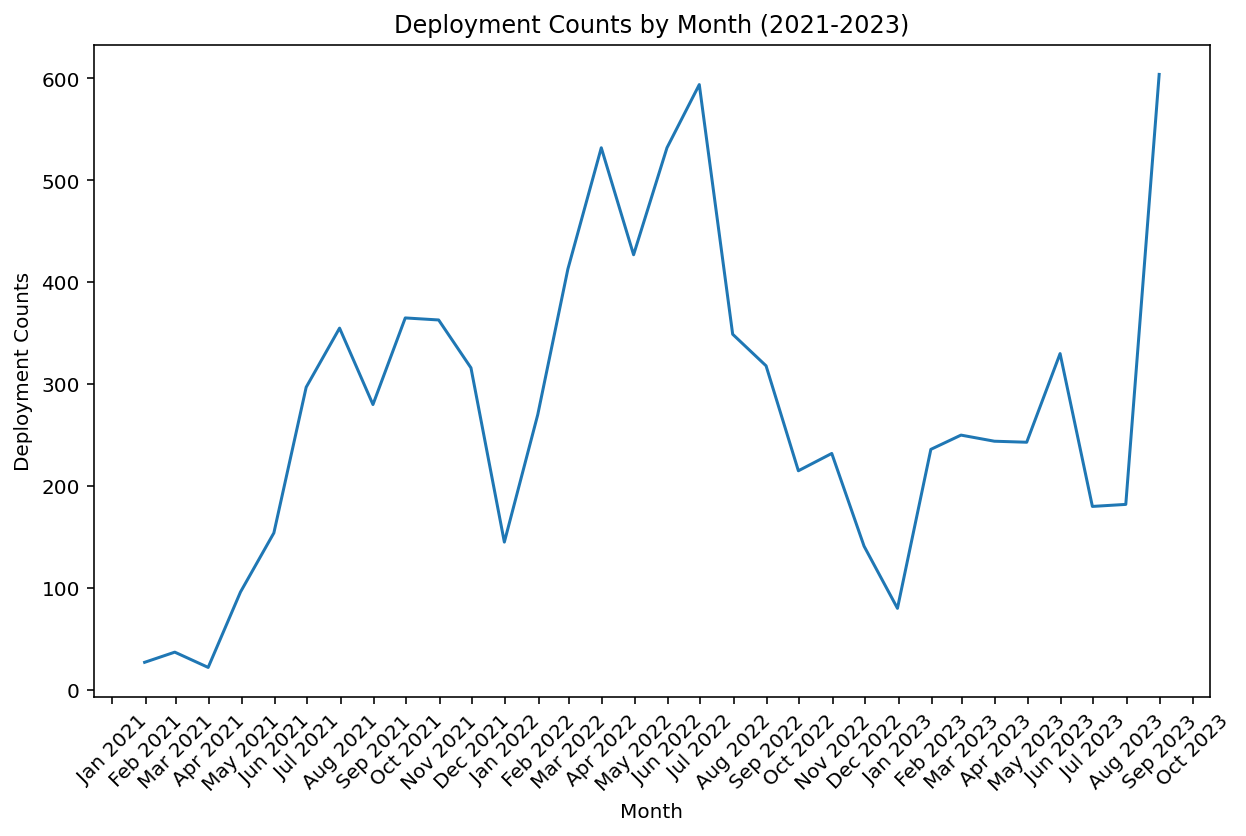

In [26]:
### Plot to show deployment counts by months for all assets

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_1 = df.copy()

# Convert SHIP DATE column to datetime format
df_1['SHIP DATE1'] = pd.to_datetime(df_1['SHIP DATE'])

# Set the SHIP DATE column as the index
df_1 = df_1.set_index('SHIP DATE1')
#display(df_1.head(3))

# Filter ship dates from 2021 to 2023
df_2021_2023 = df_1.loc[(df_1.index.year >= 2021) & (df_1.index.year <= 2023)]
#display(df_2021_2023.head(3))

# Filter ship dates from 2021 to 2023 for a specific part number
#part_number = '1JS09A4#ABA'  # Replace 'XYZ123' with your desired part number
#df_2021_2023 = df.loc[(df.index.year >= 2021) & (df.index.year <= 2023) & (df['PART_NUMBER'] == part_number)]


# Group the data by month
df_monthly = df_2021_2023.groupby(pd.Grouper(freq='M')).size()
display(df_monthly)


# Plot the deployment counts by month
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly.values)
plt.title('Deployment Counts by Month (2021-2023)')
plt.xlabel('Month')
plt.ylabel('Deployment Counts')

# Format x-axis labels as month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.show()


#### **Adding the binary column called "Demand" and merge it with the original dataset in a new dataframe called "demand\_df"**



In [29]:
### Adding column "Demand" to determine whether the asset will be in demand or not in the next three months

from datetime import datetime, timedelta

# the current month
current_month = datetime.now().month

# Get the previous month
previous_month = (current_month - 1) if (current_month - 1) > 0 else 12

# Get the next three months
next_three_months = [(current_month + i) % 12 for i in range(1, 4)]


# Filter the dataset based on the TYPE_OF_ASSET input
#asset_type = "DISPLAY / MONITOR"
#filtered_df = df_1[df_1['TYPE_OF_ASSET'] == asset_type]

# Copied original dataset
filtered_df = df.copy()

# Convert the "Ship Date" column to datetime format and extract the month
filtered_df['Ship Month'] = pd.to_datetime(filtered_df['SHIP DATE']).dt.month

# Group the data by PART_NUMBER and Ship Month and calculate the total deployment quantity
grouped_df = filtered_df.groupby(['PART_NUMBER', 'Ship Month'])['QTY'].sum().reset_index()
#print(grouped_df.head(10))


# Pivot the data to create the input matrix X
X = grouped_df.pivot(index='PART_NUMBER', columns='Ship Month', values='QTY').fillna(0)
#print(X.tail(10))

# Calculate the average deployment quantity for each PART_NUMBER in the previous month
avg_qty_by_part = X.iloc[:, previous_month].groupby(X.index).mean()


# Create the output vector Y
Y = np.zeros(len(X))

# Determine if the PART_NUMBER is in demand in the next three months
for i, part_number in enumerate(X.index):
    max_demand = np.max(X.loc[part_number, next_three_months])
    if max_demand > 0:
        if X.loc[part_number, previous_month] < avg_qty_by_part[part_number]:
            Y[i] = 1
            
# Create the binary variable "Demand?"
X['Demand?'] = Y

X['Demand?'] = X['Demand?'].astype(int)

# Merge the new column 'Demand?' to filtered_df by the PART_NUMBER
merged_df = filtered_df.merge(X[['Demand?']], left_on='PART_NUMBER', right_index=True)     
#print(merged_df.head())
#display(merged_df.iloc[0:6])



# Filtered the records that have part number in demand (For checking purposes)
#filtered_merged_df = merged_df[merged_df['Demand?'] == 1]
#print(filtered_merged_df)


### Rename the merged dataset
demand_df = merged_df.copy()
print("New dataframe called demand_df after adding the Demand column:")
print( 'Updated number of records (rows): {}'.format( demand_df.shape[0] ) )
print( 'Updated number of variables (columns): {}'.format( demand_df.shape[1] ) )

display(demand_df.head(6))



New dataframe called demand_df after adding the Demand column:
Updated number of records (rows): 8829
Updated number of variables (columns): 10


,PART_NUMBER,DESCRIPTION_,TYPE_OF_ASSET,QTY,PROGRAM_NAME,PEL_REQUESTER,SBU,SHIP DATE,Ship Month,Demand?
7469,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,AFS - AIR-GAPPED (SAUNA),FELICIA BURSE,GSD (S3 & EWS),2021-01-07,1,0
7449,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,AFS - AIR-GAPPED (SAUNA),FELICIA BURSE,GSD (S3 & EWS),2021-01-12,1,0
7503,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,ATAXARIA,JASON MATHEW,SC2,2021-01-15,1,0
7504,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,ATAXARIA,JASON MATHEW,SC2,2021-01-15,1,0
7505,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,ATAXARIA,JASON MATHEW,SC2,2021-01-15,1,0
7502,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,ATAXARIA,JASON MATHEW,SC2,2021-01-15,1,0


In [30]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8829 entries, 7469 to 8716
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PART_NUMBER    8829 non-null   object        
 1   DESCRIPTION_   8829 non-null   object        
 2   TYPE_OF_ASSET  8829 non-null   object        
 3   QTY            8829 non-null   float64       
 4   PROGRAM_NAME   8829 non-null   object        
 5   PEL_REQUESTER  8829 non-null   object        
 6   SBU            8829 non-null   object        
 7   SHIP DATE      8829 non-null   datetime64[ns]
 8   Ship Month     8829 non-null   int32         
 9   Demand?        8829 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(6)
memory usage: 724.3+ KB


#### **EDA**



#### One\-hot encode the categorical variables in merged\_df



In [31]:
# Create a list of categorical variables
categorical_vars = ['PROGRAM_NAME', 'PEL_REQUESTER', 'SBU', 'Ship Month']

# Apply one-hot encoding to the categorical variables
df_encoded = pd.get_dummies(demand_df, columns=categorical_vars, dtype=int)

# View the encoded DataFrame
df_encoded.head()

,PART_NUMBER,DESCRIPTION_,TYPE_OF_ASSET,QTY,SHIP DATE,Demand?,PROGRAM_NAME_2022 - MULTI PL SUSTAINMENT,PROGRAM_NAME_2022 - MULTI SUSTAINMENT,PROGRAM_NAME_2022 - Multi PL Sustainment: 2022,PROGRAM_NAME_2022 - Multi PL Sustainment: 2022 - Sustainment Q3,...,Ship Month_3,Ship Month_4,Ship Month_5,Ship Month_6,Ship Month_7,Ship Month_8,Ship Month_9,Ship Month_10,Ship Month_11,Ship Month_12
7469,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,2021-01-07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7449,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,2021-01-12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7503,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,2021-01-15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7504,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,2021-01-15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7505,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,2021-01-15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
### Calculating the correlation matrix

# Remove the 'PART_NUMBER' column from the encoded DataFrame
df_encoded_filtered = df_encoded.drop(columns=['PART_NUMBER', 'DESCRIPTION_', 'TYPE_OF_ASSET','SHIP DATE', 'QTY'])


# Calculate correlation matrix
corr_matrix = df_encoded_filtered.corr()

# Extract correlation with the "Demand" variable
demand_corr = corr_matrix['Demand?']

# Sort the correlation values in descending order
sorted_demand_corr = demand_corr.sort_values(ascending=False)

# Print the correlation values
print(sorted_demand_corr)

Demand?                        1.000000
PROGRAM_NAME_PHONE REFRESH     0.250330
PEL_REQUESTER_JOHN CHISHOLM    0.226944
PEL_REQUESTER_BRYAN KENNEDY    0.226869
PEL_REQUESTER_EVAN SZAPIRO     0.207546
                                 ...   
Ship Month_9                  -0.062448
PEL_REQUESTER_HENRY BOULE     -0.063194
SBU_REFRESH                   -0.064043
Ship Month_6                  -0.067836
SBU_MULTI-BUSINESS UNIT       -0.114005
Name: Demand?, Length: 553, dtype: float64


In [33]:
### print the top features with the highest absolute correlation values greater than a certain threshold:

# Set the correlation threshold
threshold = 0.15

# Get the top correlated features with the "Demand" variable
top_corr_features = sorted_demand_corr[abs(sorted_demand_corr) > threshold]

# Print the top correlated features
display(top_corr_features)

Demand?                          1.000000
PROGRAM_NAME_PHONE REFRESH       0.250330
PEL_REQUESTER_JOHN CHISHOLM      0.226944
PEL_REQUESTER_BRYAN KENNEDY      0.226869
PEL_REQUESTER_EVAN SZAPIRO       0.207546
Ship Month_12                    0.169436
PROGRAM_NAME_SC2 - OPIR POLAR    0.155646
SBU_SNS (CAMS & ISRS)            0.154099
Name: Demand?, dtype: float64

##### Visualize the top features that are correlated to Demand variable



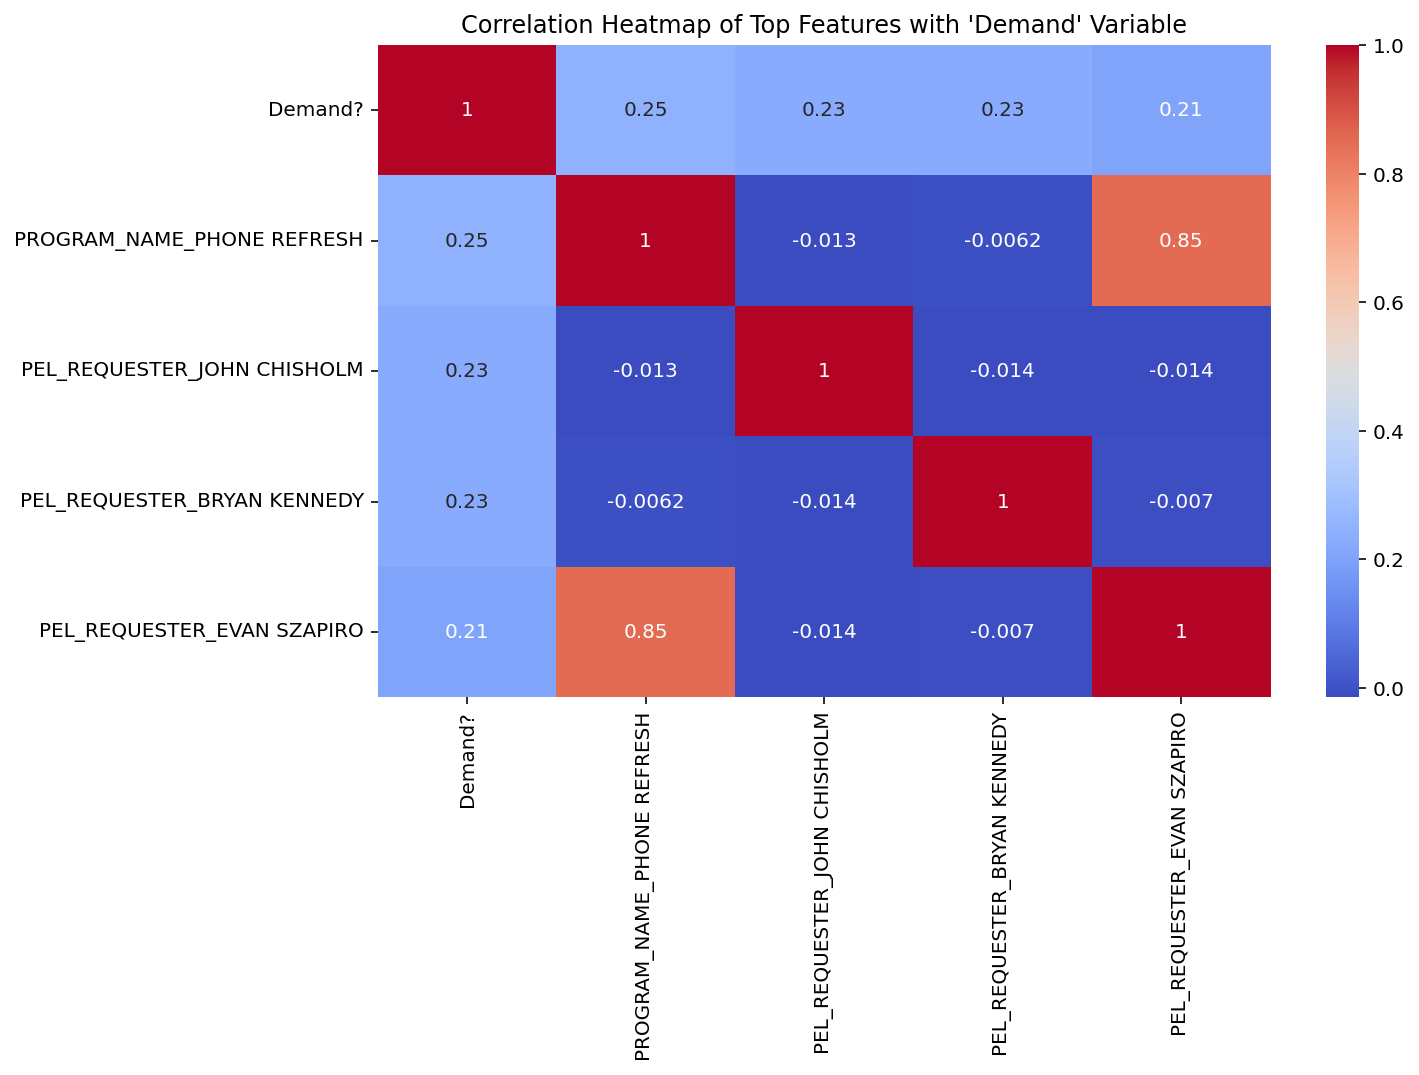

In [35]:
# Set the correlation threshold
threshold = 0.2

# Get the top correlated features with the "Demand" variable
top_corr_features = sorted_demand_corr[abs(sorted_demand_corr) > threshold]

# Create a subset of the encoded DataFrame with only the top correlated features
df_subset = df_encoded_filtered[top_corr_features.index]

# Compute the correlation matrix of the subset DataFrame
corr_subset = df_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_subset, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Top Features with 'Demand' Variable")
plt.show()

#### Splitting the data into training and testing set



Note that I excluded DESCRIPTION\_ and TYPE\_OF\_ASSET variables because they are linked to each PART\_NUMBER so these variables are irrelevant to the purpose of the study. Hence, I removed them from the new dataframe.



In [36]:
### Check the encoded dataset before splitting

print("Encoded dataframe called df_encoded after adding coding PROGRAM_NAME, SBU, PEL/REQUESTER variables:")
print( 'Updated number of records (rows): {}'.format( df_encoded.shape[0] ) )
print( 'Updated number of variables (columns): {}'.format( df_encoded.shape[1] ) )

df_encoded.head(1)


Encoded dataframe called df_encoded after adding coding PROGRAM_NAME, SBU, PEL/REQUESTER variables:
Updated number of records (rows): 8829
Updated number of variables (columns): 558


,PART_NUMBER,DESCRIPTION_,TYPE_OF_ASSET,QTY,SHIP DATE,Demand?,PROGRAM_NAME_2022 - MULTI PL SUSTAINMENT,PROGRAM_NAME_2022 - MULTI SUSTAINMENT,PROGRAM_NAME_2022 - Multi PL Sustainment: 2022,PROGRAM_NAME_2022 - Multi PL Sustainment: 2022 - Sustainment Q3,...,Ship Month_3,Ship Month_4,Ship Month_5,Ship Month_6,Ship Month_7,Ship Month_8,Ship Month_9,Ship Month_10,Ship Month_11,Ship Month_12
7469,1JS09A8#ABA,HP Z24N G2 DISPLAY,DISPLAY / MONITOR,1.0,2021-01-07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Getting the value of current month, previous month and next three months



In [37]:
from datetime import datetime, timedelta

# the current month
current_month = datetime.now().month

# Get the previous month
previous_month = (current_month - 1) if (current_month - 1) > 0 else 12

# Get the next three months
next_three_months = [(current_month + i) % 12 for i in range(1, 4)]

##### **Selecting predictors and response variables**



In [38]:
### Remove irrelant variable from encoded dataframe and create a new data frame with the predictors

df_encoded_predictors = df_encoded.drop(columns=['PART_NUMBER', 'DESCRIPTION_', 'TYPE_OF_ASSET','SHIP DATE', 'QTY', 'Demand?'])
df_encoded_predictors.head(1)

,PROGRAM_NAME_2022 - MULTI PL SUSTAINMENT,PROGRAM_NAME_2022 - MULTI SUSTAINMENT,PROGRAM_NAME_2022 - Multi PL Sustainment: 2022,PROGRAM_NAME_2022 - Multi PL Sustainment: 2022 - Sustainment Q3,PROGRAM_NAME_2022 - Multi PL Sustainment: 2022 - Sustainment Q4,PROGRAM_NAME_2022 - Multi PL Sustainment: Sustainment Q2,PROGRAM_NAME_30025,PROGRAM_NAME_30038 HIGH POWER B FOR S3 IN FOREST,PROGRAM_NAME_9850 UPGRADE,PROGRAM_NAME_A TEAM,...,Ship Month_3,Ship Month_4,Ship Month_5,Ship Month_6,Ship Month_7,Ship Month_8,Ship Month_9,Ship Month_10,Ship Month_11,Ship Month_12
7469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
### Select the response column 'Demand?' as a response variable for our model
y_response = df_encoded['Demand?']



##### **Splitting the training and testing data set**



In [40]:
### splitting

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets ( 80:20 ratio)
x_train, x_test, y_train, y_test = train_test_split(df_encoded_predictors, y_response, test_size=0.2, random_state=123)

In [41]:
### Checking to see how many records are in testing and training set

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (7063, 552)
x_test:  (1766, 552)
y_train:  (7063,)
y_test:  (1766,)


### **Logistic Regression**



In [42]:
# Initialize and fit the logistic regression model using the training data
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict the demand possibility for each PART_NUMBER using the testing data
lr_predictions = logreg.predict(x_test)

# Create a DataFrame to store the results
lr_results = pd.DataFrame({'PART_NUMBER': x_test.index, 'Prediction': lr_predictions})

# Create a list to store the predictions
lr_prediction_list = []


# Loop through each PART_NUMBER and its corresponding deployment quantities
for part_number, row in X.iterrows():
    # Get the deployment quantities for the previous month and the next three months
    previous_month_qty = row[12]
    next_three_months_qty = sum(row[1:4])
    
    # Check the criteria for predicting demand
    if next_three_months_qty > 0 and previous_month_qty < avg_qty_by_part[previous_month]:
        prediction = 1
    else:
        prediction = 0
    
    # Create a dictionary with the part number and prediction
    prediction_dict = {'PART_NUMBER': part_number, 'Prediction': prediction}
    
    # Append the dictionary to the list
    lr_prediction_list.append(prediction_dict)

# Create a DataFrame from the list
lr_prediction_df = pd.DataFrame(lr_prediction_list)

# Display the DataFrame
print(lr_prediction_df)

                         PART_NUMBER  Prediction
0                       0641-5500-00           0
1                      090-15200-600           0
2                      090-15200-604           0
3    110-E3B-42-15AF-BLK-ACCESSORIES           0
4         110-E3B-42-15AF-BLK-LOADED           0
..                               ...         ...
501                          Z3T91AV           0
502                          Z3Y91AV           0
503                      Z3Y91AV#ABA           0
504                          Z3Z16AV           0
505                      Z8J68US#ABA           0

[506 rows x 2 columns]


In [43]:
### Get the list of indeces of PART_NUMBER that will be in demand in the next three months, Demand = 1


count = 0

for x in range(len(lr_predictions)):
    if lr_predictions[x] == 1:
        count += 1
        print(x, end="\t")

print("\nTotal outputs:", count) ##88 par numbers

1	19	29	36	77	103	110	122	165	179	220	230	239	242	270	278	283	288	291	304	399	459	465	472	479	486	519	532	535	602	614	625	668	693	718	752	755	773	793	802	864	866	892	921	964	996	1013	1023	1032	1079	1089	1098	1107	1122	1142	1152	1153	1165	1186	1250	1291	1312	1327	1336	1357	1373	1437	1446	1493	1540	1559	1575	1577	1581	1588	1604	1607	1609	1637	1644	1660	1670	1671	1702	1705	1716	1746	1751	
Total outputs: 88


In [45]:
### Find the AUC-ROC score and Accuracy value

roc_score_lr = roc_auc_score(y_test, lr_predictions)
print("AUC-ROC score value:", roc_score_lr)
#Then finally, AUC-ROC score value, closer to 1 makes the system more accurate

# Calculate the accuracy of the model
accuracy_lr = accuracy_score(y_test, lr_predictions)
print("Accuracy:", accuracy_lr)



AUC-ROC score value: 0.70283701743462
Accuracy: 0.9354473386183465


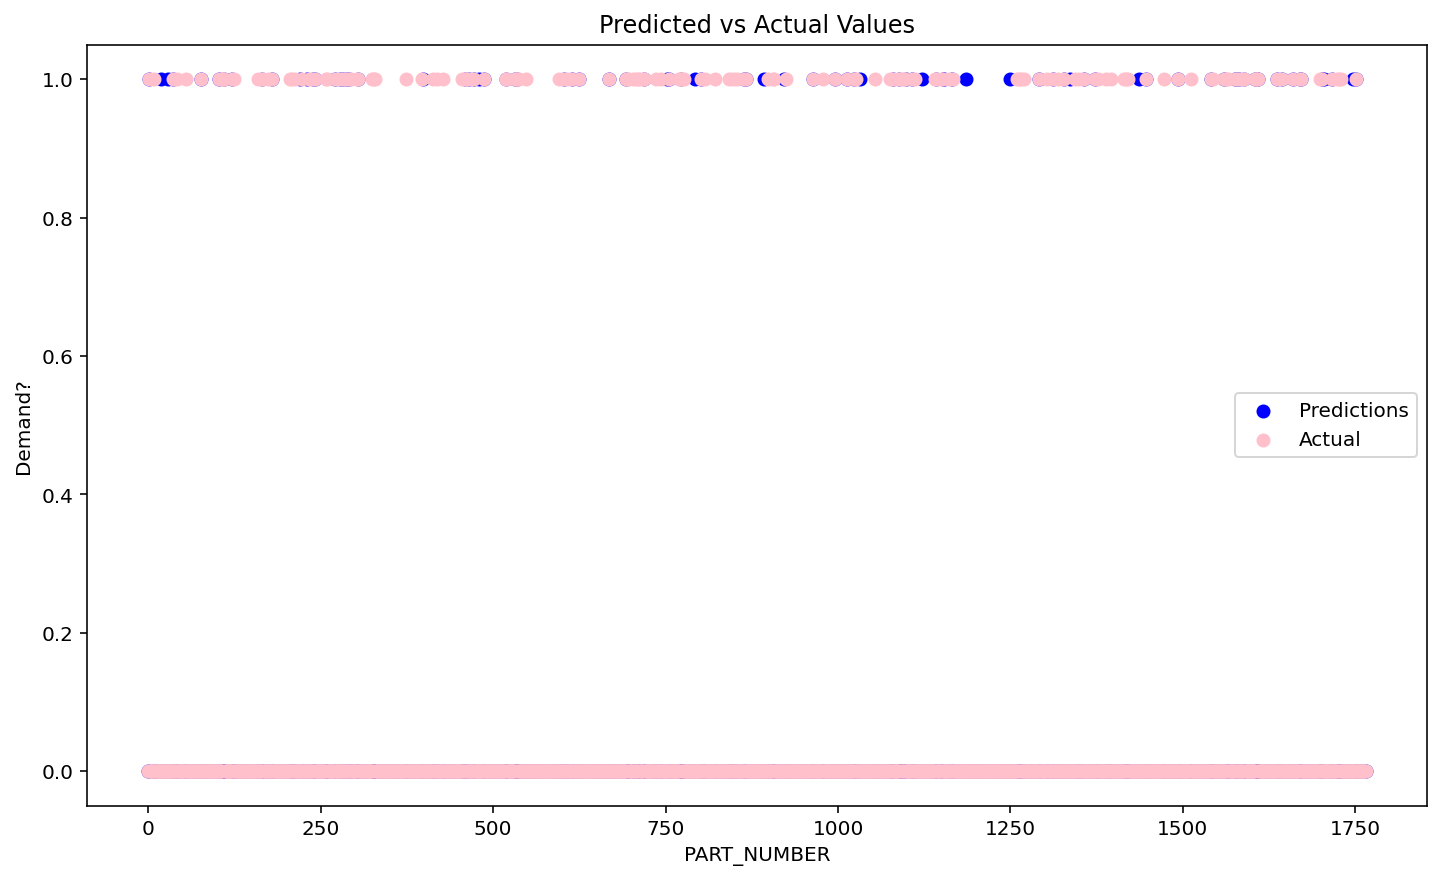

In [46]:
### Show the actual vs predicted plot

# Visualize the predictions
plt.scatter(range(len(lr_predictions)), lr_predictions, c="blue", label="Predictions")
plt.scatter(range(len(lr_predictions)), y_test, c="pink", label="Actual")
plt.xlabel("PART_NUMBER")
plt.ylabel("Demand?")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()

[[1585   21]
 [  93   67]]
1766


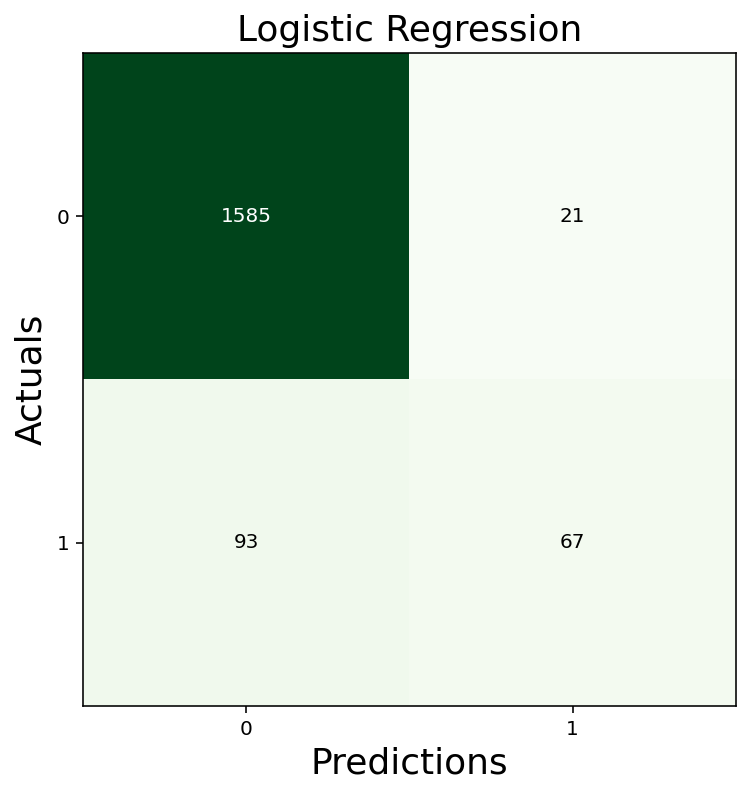

Text(0.5, 1.0, 'Logistic Regression')

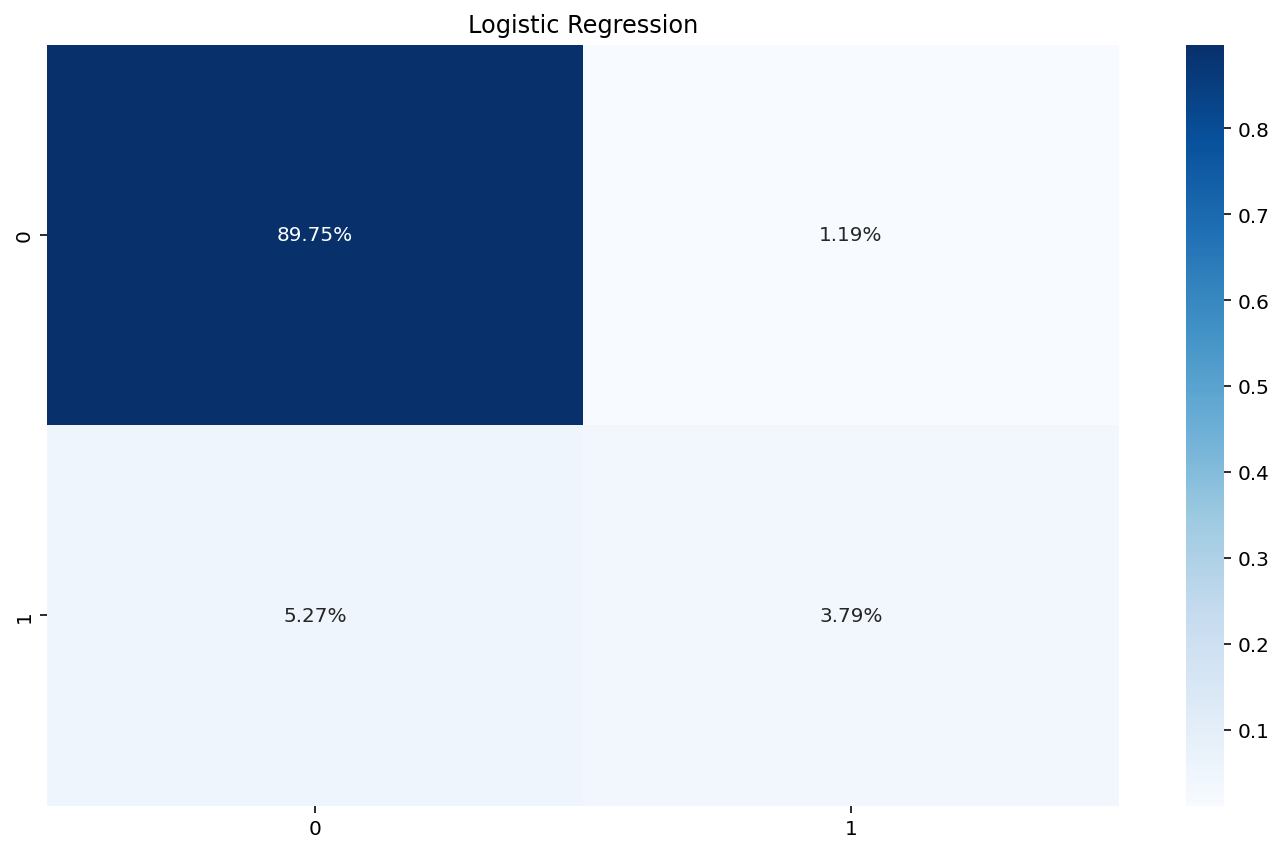

In [114]:
### Confusion Matrix


# Predict the demand for each PART_NUMBER using the testing data
#lr_predictions = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
print(lr_conf_matrix)
total_samples = np.sum(lr_conf_matrix)
print(total_samples)


#Visualizing confusion matrix for a better view,
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=lr_conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression', fontsize=18)
plt.show()




In [115]:
#Overall metrics report of the logistic regression by Precision, Recall, F1 Score makes more understanding by how detailed our model predicts the data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("LOGISTIC REGRESSION:\n")


roc_score_lr = roc_auc_score(y_test, lr_predictions)
print("AUC-ROC score value:", roc_score_lr)

lr_acc = accuracy_score(y_test, lr_predictions)
print("Accuracy:", lr_acc)

lr_ppv = precision_score(y_test, lr_predictions)
print("Precision:", lr_ppv)

lr_tpr = recall_score(y_test, lr_predictions)
print("Sensitivity:", lr_tpr)

lr_cm = confusion_matrix(y_test, lr_predictions)
lr_TN = lr_cm[0, 0]
lr_FP = lr_cm[0, 1]
lr_tnr = lr_TN / (lr_TN + lr_FP)
print("Specificity:", lr_tnr)

lr_f_score = f1_score(y_test, lr_predictions)
print("F score:", lr_f_score)

import sklearn.metrics as metrics
print(metrics.classification_report(y_test, lr_predictions))

LOGISTIC REGRESSION:

AUC-ROC score value: 0.70283701743462
Accuracy: 0.9354473386183465
Precision: 0.7613636363636364
Sensitivity: 0.41875
Specificity: 0.9869240348692403
F score: 0.5403225806451613
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1606
           1       0.76      0.42      0.54       160

    accuracy                           0.94      1766
   macro avg       0.85      0.70      0.75      1766
weighted avg       0.93      0.94      0.93      1766



In [63]:
#find the variables that have an impact on the demand for a part number,

# Get the regression coefficient for each independent variable
coefficients = logreg.coef_

# Get the names of the independent variables
variable_names = x_train.columns

# Create a DataFrame to store the regression coefficients
coefficients_df = pd.DataFrame({'Independent Variable': variable_names, 'Coefficient': coefficients[0]})

# Sort the DataFrame by coefficient value
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
print(coefficients_df)

                                  Independent Variable  Coefficient
441                        PEL_REQUESTER_BRYAN KENNEDY     3.433431
32   PROGRAM_NAME_AFS - STARWAN EXPANSION - EL SEGUNDO     3.141518
284                         PROGRAM_NAME_PHONE REFRESH     3.096915
351  PROGRAM_NAME_SC2 - NG OPIR GEO P2 - Network Ex...     2.760815
163                              PROGRAM_NAME_HEIMDALL     2.681290
..                                                 ...          ...
436                          PEL_REQUESTER_AMY MUSKARA    -1.363553
30                PROGRAM_NAME_AFS - STARWAN EXPANSION    -1.457584
488                             PEL_REQUESTER_MAI TRAN    -1.518179
331                 PROGRAM_NAME_S3 - LUBBOCK/BREWSTER    -1.520541
187                            PROGRAM_NAME_Jaguar OKC    -2.207997

[552 rows x 2 columns]


### **SVM**



In [64]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta


# Initialize and fit the SVM model using the training data
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

# Predict the demand for each PART_NUMBER using the testing data
svm_predictions = svm.predict(x_test)

# Create a DataFrame to store the results
svm_results = pd.DataFrame({'PART_NUMBER': x_test.index, 'Prediction': svm_predictions})

# Create a list to store the predictions
svm_prediction_list = []



# Loop through each PART_NUMBER and its corresponding deployment quantities
for part_number, row in X.iterrows():
    # Get the deployment quantities for the previous month and the next three months
    previous_month_qty = row[12]
    next_three_months_qty = sum(row[1:4])
    
    # Check the criteria for predicting demand
    if next_three_months_qty > 0 and previous_month_qty < avg_qty_by_part[previous_month]:
        prediction = 1
    else:
        prediction = 0
    
    # Create a dictionary with the part number and prediction
    prediction_dict = {'PART_NUMBER': part_number, 'Prediction': prediction}
    
    # Append the dictionary to the list
    svm_prediction_list.append(prediction_dict)

# Create a DataFrame from the list
svm_prediction_df = pd.DataFrame(svm_prediction_list)

# Display the DataFrame
print(svm_prediction_df)

                         PART_NUMBER  Prediction
0                       0641-5500-00           0
1                      090-15200-600           0
2                      090-15200-604           0
3    110-E3B-42-15AF-BLK-ACCESSORIES           0
4         110-E3B-42-15AF-BLK-LOADED           0
..                               ...         ...
501                          Z3T91AV           0
502                          Z3Y91AV           0
503                      Z3Y91AV#ABA           0
504                          Z3Z16AV           0
505                      Z8J68US#ABA           0

[506 rows x 2 columns]


In [65]:
### Get the list of indeces of PART_NUMBER that will be in demand in the next three months, Demand = 1


for x in range(len(svm_predictions)):
    if svm_predictions[x] == 1:
        count += 1
        print(x, end="\t")

print("\nTotal outputs:", count) ## 190 part numbers        

1	19	29	36	50	77	103	110	122	165	179	220	230	233	239	242	270	271	278	283	288	291	304	324	359	399	418	459	465	472	479	486	519	532	535	596	602	614	625	668	693	703	718	752	755	773	774	793	802	842	864	866	921	964	996	1013	1023	1032	1079	1089	1092	1098	1107	1122	1142	1152	1165	1186	1236	1250	1291	1312	1327	1336	1357	1373	1389	1437	1446	1493	1506	1540	1559	1566	1575	1577	1581	1588	1604	1607	1609	1637	1641	1644	1660	1670	1671	1702	1705	1716	1746	1751	
Total outputs: 190


In [66]:
### Find AUC-ROC score and Accuracy

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

roc_score_svm = roc_auc_score(y_test, svm_predictions)
print("AUC-ROC score value:", roc_score_svm)
#Then finally, AUC-ROC score value, closer to 1 makes the system more accurate

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, svm_predictions)
print("Accuracy:", accuracy_svm)

AUC-ROC score value: 0.7294053549190537
Accuracy: 0.9377123442808607


SVM: 



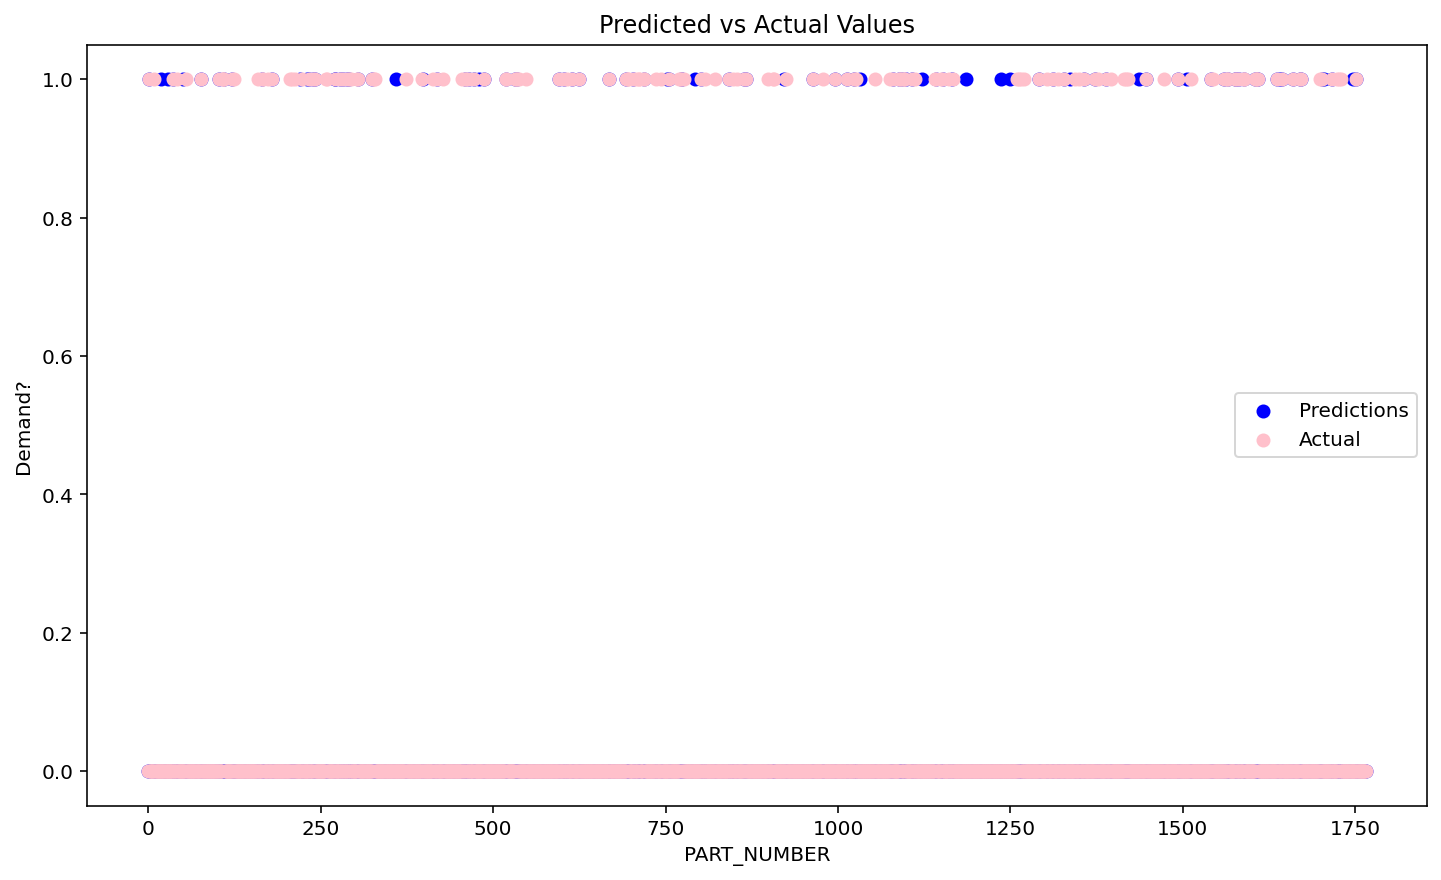

In [116]:
### Show the actual vs predicted plot

print("SVM: \n")
# Visualize the predictions
plt.scatter(range(len(svm_predictions)), svm_predictions, c="blue", label="Predictions")
plt.scatter(range(len(svm_predictions)), y_test, c="pink", label="Actual")
plt.xlabel("PART_NUMBER")
plt.ylabel("Demand?")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()


[[1580   26]
 [  84   76]]
1766


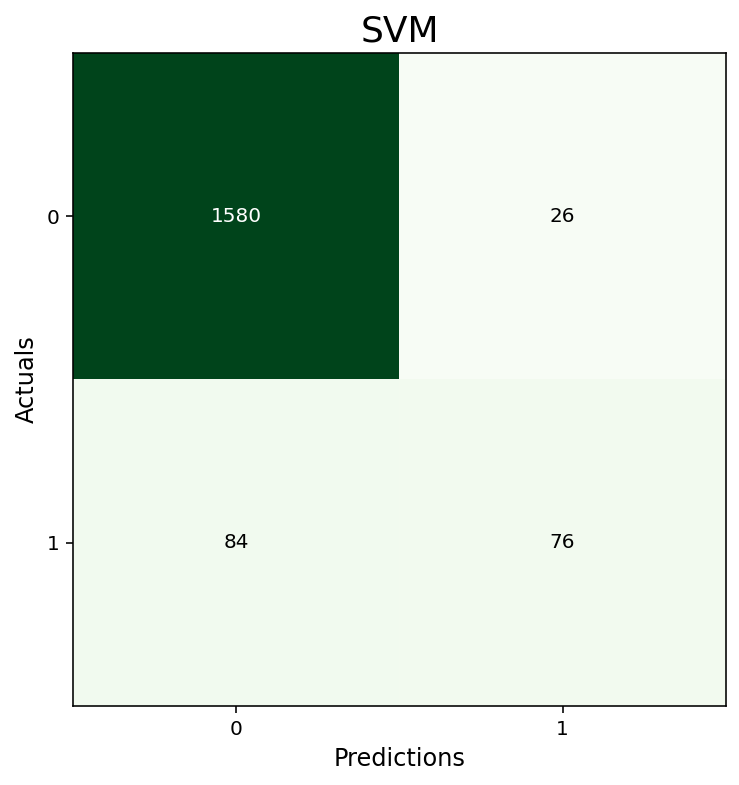

In [117]:
### Confusion Matrix


# Predict the demand for each PART_NUMBER using the testing data
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print(svm_conf_matrix)
total_samples = np.sum(svm_conf_matrix)
print(total_samples)


#Visualizing confusion matrix for a better view,
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=svm_conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('SVM', fontsize=18)
plt.show()




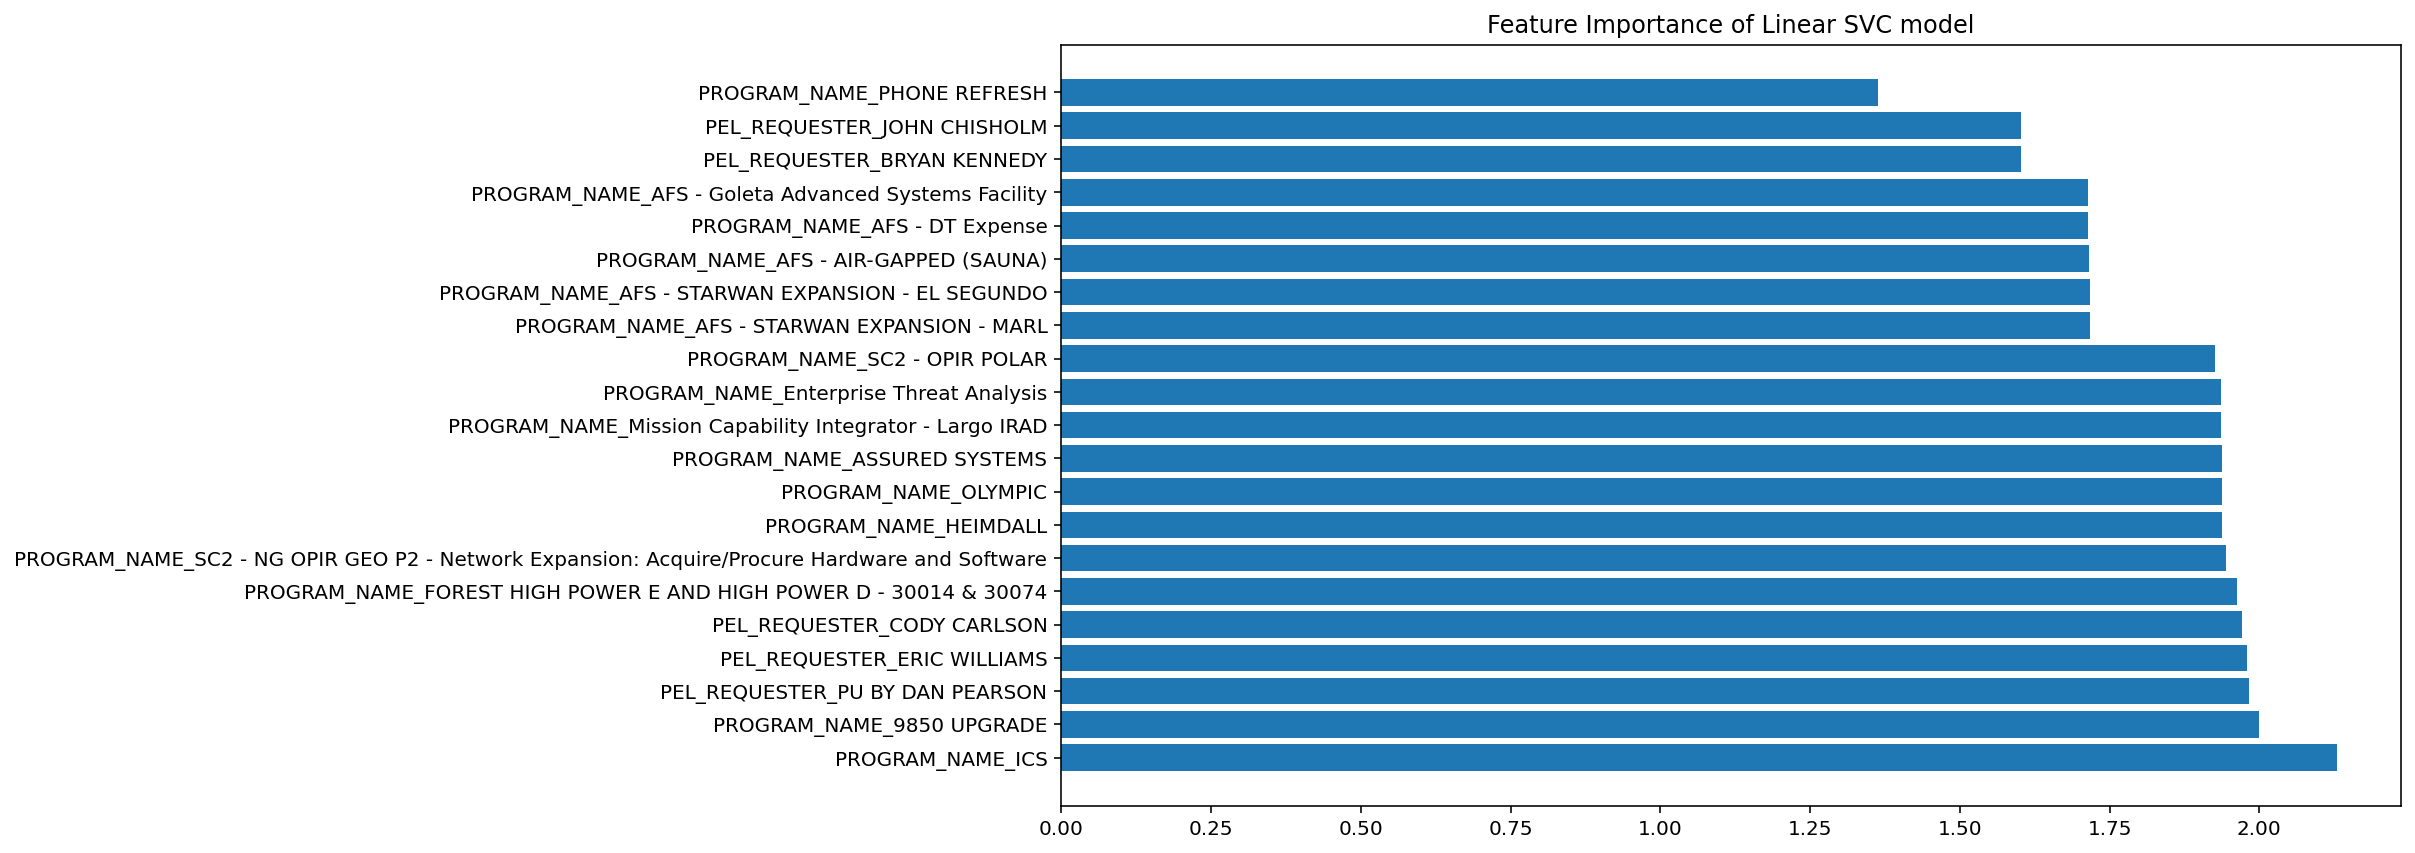

In [118]:
# feature importance of Linear SVC model
feature_importance = pd.Series(svm.coef_[0], index = x_train.columns).sort_values(ascending=False)

# plotting feature importance
plt.barh(feature_importance.index[:21], feature_importance[:21])
plt.title("Feature Importance of Linear SVC model")
plt.show()

In [119]:
#Overall metrics report of the logistic regression by Precision, Recall, F1 Score makes more understanding by how detailed our model predicts the data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("SVM:\n")

svm_acc = accuracy_score(y_test, svm_predictions)
print("Accuracy:", svm_acc)

svm_ppv = precision_score(y_test, svm_predictions)
print("Precision:", svm_ppv)

svm_tpr = recall_score(y_test, svm_predictions)
print("Sensitivity:", svm_tpr)

svm_cm = confusion_matrix(y_test, svm_predictions)
svm_TN = svm_cm[0, 0]
svm_FP = lr_cm[0, 1]
svm_tnr = lr_TN / (svm_TN + svm_FP)
print("Specificity:", svm_tnr)

svm_f_score = f1_score(y_test, svm_predictions)
print("F score:", svm_f_score)

import sklearn.metrics as metrics
print(metrics.classification_report(y_test, svm_predictions))

SVM:

Accuracy: 0.9377123442808607
Precision: 0.7450980392156863
Sensitivity: 0.475
Specificity: 0.9900062460961899
F score: 0.5801526717557252
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1606
           1       0.75      0.47      0.58       160

    accuracy                           0.94      1766
   macro avg       0.85      0.73      0.77      1766
weighted avg       0.93      0.94      0.93      1766



### **Decision Tree**



In [120]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

# Initialize and fit the decision tree model using the training data
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the demand for each PART_NUMBER using the testing data
tree_predictions = tree.predict(x_test)

# Create a DataFrame to store the results
tree_results = pd.DataFrame({'PART_NUMBER': x_test.index, 'Prediction': tree_predictions})

# Create a list to store the predictions
tree_prediction_list = []


# Loop through each PART_NUMBER and its corresponding deployment quantities
for part_number, row in X.iterrows():
    # Get the deployment quantities for the previous month and the next three months
    previous_month_qty = row[12]
    next_three_months_qty = sum(row[1:4])
    
    # Check the criteria for predicting demand
    if next_three_months_qty > 0 and previous_month_qty < avg_qty_by_part[previous_month]:
        prediction = 1
    else:
        prediction = 0
    
    # Create a dictionary with the part number and prediction
    prediction_dict = {'PART_NUMBER': part_number, 'Prediction': prediction}
    
    # Append the dictionary to the list
    tree_prediction_list.append(prediction_dict)

# Create a DataFrame from the list
tree_prediction_df = pd.DataFrame(tree_prediction_list)

# Display the DataFrame
print(tree_prediction_df)

                         PART_NUMBER  Prediction
0                       0641-5500-00           0
1                      090-15200-600           0
2                      090-15200-604           0
3    110-E3B-42-15AF-BLK-ACCESSORIES           0
4         110-E3B-42-15AF-BLK-LOADED           0
..                               ...         ...
501                          Z3T91AV           0
502                          Z3Y91AV           0
503                      Z3Y91AV#ABA           0
504                          Z3Z16AV           0
505                      Z8J68US#ABA           0

[506 rows x 2 columns]


In [121]:
### Get the list of indeces of PART_NUMBER that will be in demand in the next three months, Demand = 1


for x in range(len(tree_predictions)):
    if tree_predictions[x] == 1:
        count += 1
        print(x, end="\t")

print("\nTotal outputs:", count) ## 316 part numbers     

1	8	19	36	77	103	110	122	159	165	179	183	220	223	230	233	239	242	270	278	283	288	291	294	304	324	327	399	418	459	465	472	486	519	532	533	535	537	547	596	602	607	614	625	668	693	696	698	703	718	736	744	752	755	770	772	773	774	777	793	802	807	816	842	854	864	866	899	903	907	918	921	964	987	996	1013	1023	1032	1079	1089	1092	1098	1107	1122	1142	1152	1165	1236	1250	1291	1312	1327	1344	1357	1359	1373	1377	1389	1415	1446	1493	1540	1559	1564	1566	1575	1577	1581	1588	1604	1606	1607	1609	1637	1644	1660	1670	1671	1698	1702	1705	1716	1726	1746	1751	1752	1755	
Total outputs: 569


In [124]:
### Find AUC-ROC score and Accuracy

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

roc_score_tree = roc_auc_score(y_test, tree_predictions)
print("AUC-ROC score value:", roc_score_tree)
#Then finally, AUC-ROC score value, closer to 1 makes the system more accurate

# Calculate the accuracy of the model
accuracy_tree = accuracy_score(y_test, tree_predictions)
print("Accuracy:", accuracy_tree)

AUC-ROC score value: 0.8109666874221669
Accuracy: 0.9530011325028312


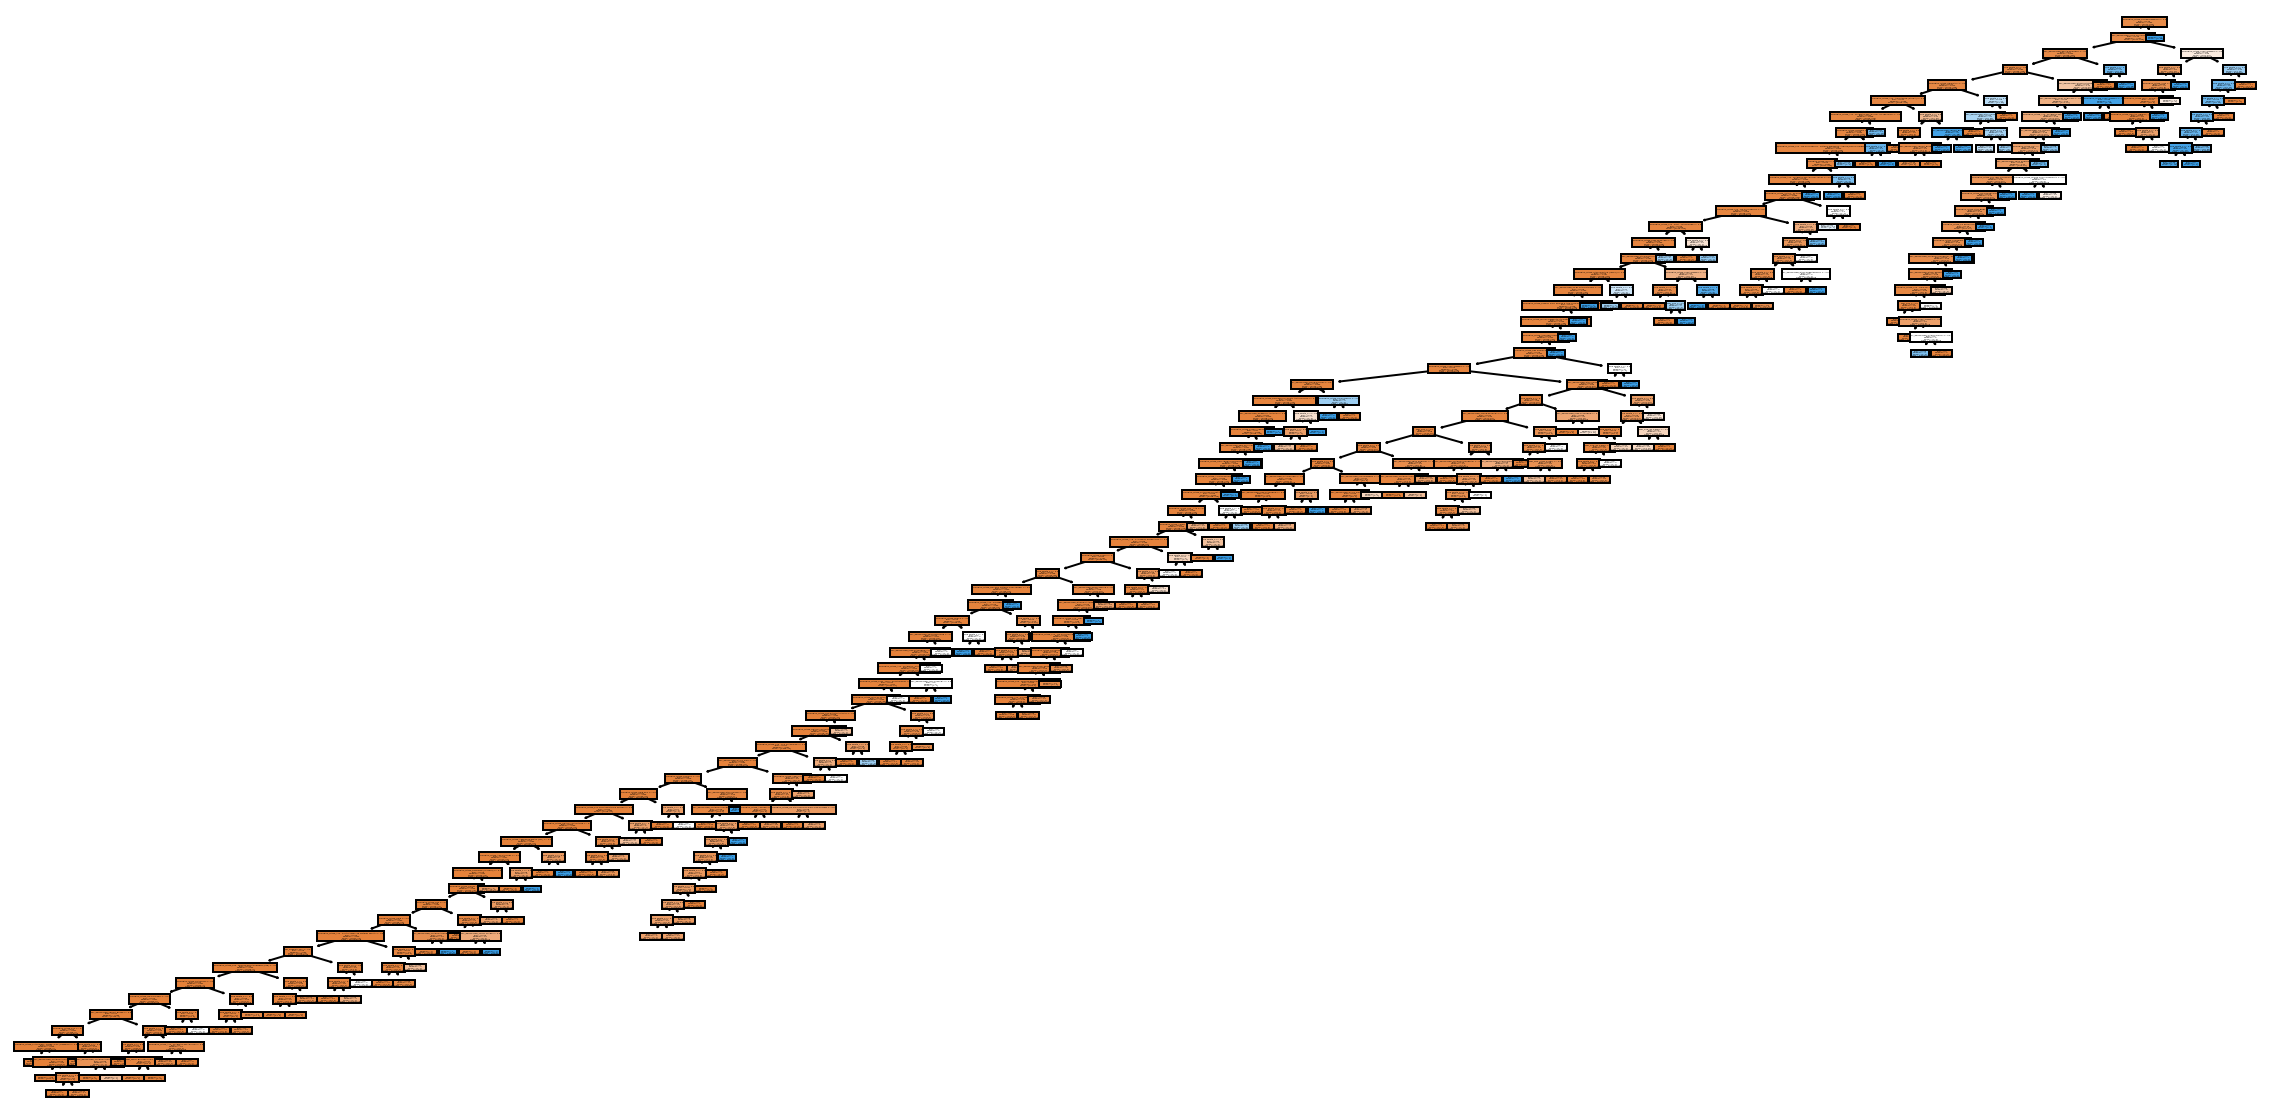

In [125]:
### Plot the tree

from sklearn import tree
import matplotlib.pyplot as plt

# Train a decision tree classifier (or regressor) model
model = tree.DecisionTreeClassifier()  # or DecisionTreeRegressor()
model.fit(x_train, y_train)  # Replace X_train and y_train with your own training data

# Visualize the decision tree
fig = plt.figure(figsize=(20, 10))
_ = tree.plot_tree(model,
                   feature_names=df_encoded_predictors.columns,
                   class_names=['No Demand', 'Demand'],
                   filled=True)
# Save the plot as a file
plt.savefig('decision_tree_plot.png')  # Change the filename as desired

# Display the plot
plt.show()

In [126]:
# After pruning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#x_train, x_test, y_train, y_test = train_test_split(x_predictors, y_response, test_size=0.2, random_state=123)

#path = tree.cost_complexity_pruning_path(x_train,y_train)
path = DecisionTreeClassifier().cost_complexity_pruning_path(x_train, y_train)

# Retrieve ccp_alphas and impurities from path
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("Value of alpha ccp :", ccp_alphas)
print()
print("Decision tree impurity :",impurities)

Value of alpha ccp : [0.00000000e+00 0.00000000e+00 7.23284275e-07 9.25378410e-07
 1.34840854e-06 1.39490539e-06 1.49034628e-06 2.79439928e-06
 2.91746575e-06 3.04120783e-06 4.49469514e-06 5.21669368e-06
 7.64280145e-06 7.82314797e-06 8.13348556e-06 8.78790394e-06
 9.43885979e-06 9.43885979e-06 1.17571762e-05 1.22143200e-05
 1.24814226e-05 1.57121316e-05 1.69899476e-05 1.87604667e-05
 2.01256366e-05 2.04922614e-05 2.09296456e-05 2.27290269e-05
 2.42332669e-05 2.66105028e-05 2.81057860e-05 2.81258953e-05
 2.81407000e-05 3.50989047e-05 3.60113020e-05 3.64070306e-05
 3.77554391e-05 3.77554391e-05 3.97477711e-05 4.18403504e-05
 4.19504879e-05 4.71942989e-05 5.66331587e-05 5.78073709e-05
 6.13828684e-05 6.85441008e-05 7.07914484e-05 7.10488718e-05
 7.53439102e-05 7.55108783e-05 7.62369444e-05 7.71435459e-05
 8.46596382e-05 8.49497381e-05 9.43885979e-05 1.05822078e-04
 1.07342039e-04 1.07872683e-04 1.16698630e-04 1.16719559e-04
 1.18079160e-04 1.26782834e-04 1.30246846e-04 1.37799110e-04
 1.

In [127]:
### Using cpp_alphas to be one of the parameters in DecisionTreeClassifier()

tree_clfs = []

for ccp_alpha in ccp_alphas:
    tree_clf=DecisionTreeClassifier(random_state=123, ccp_alpha=ccp_alpha)
    tree_clf.fit(x_train, y_train)
    tree_clfs.append(tree_clf)
    
print("Last node in new decision tree is {} and ccp_alpha for the last node is {}".format(tree_clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in new decision tree is 1 and ccp_alpha for the last node is 0.008680494424492563


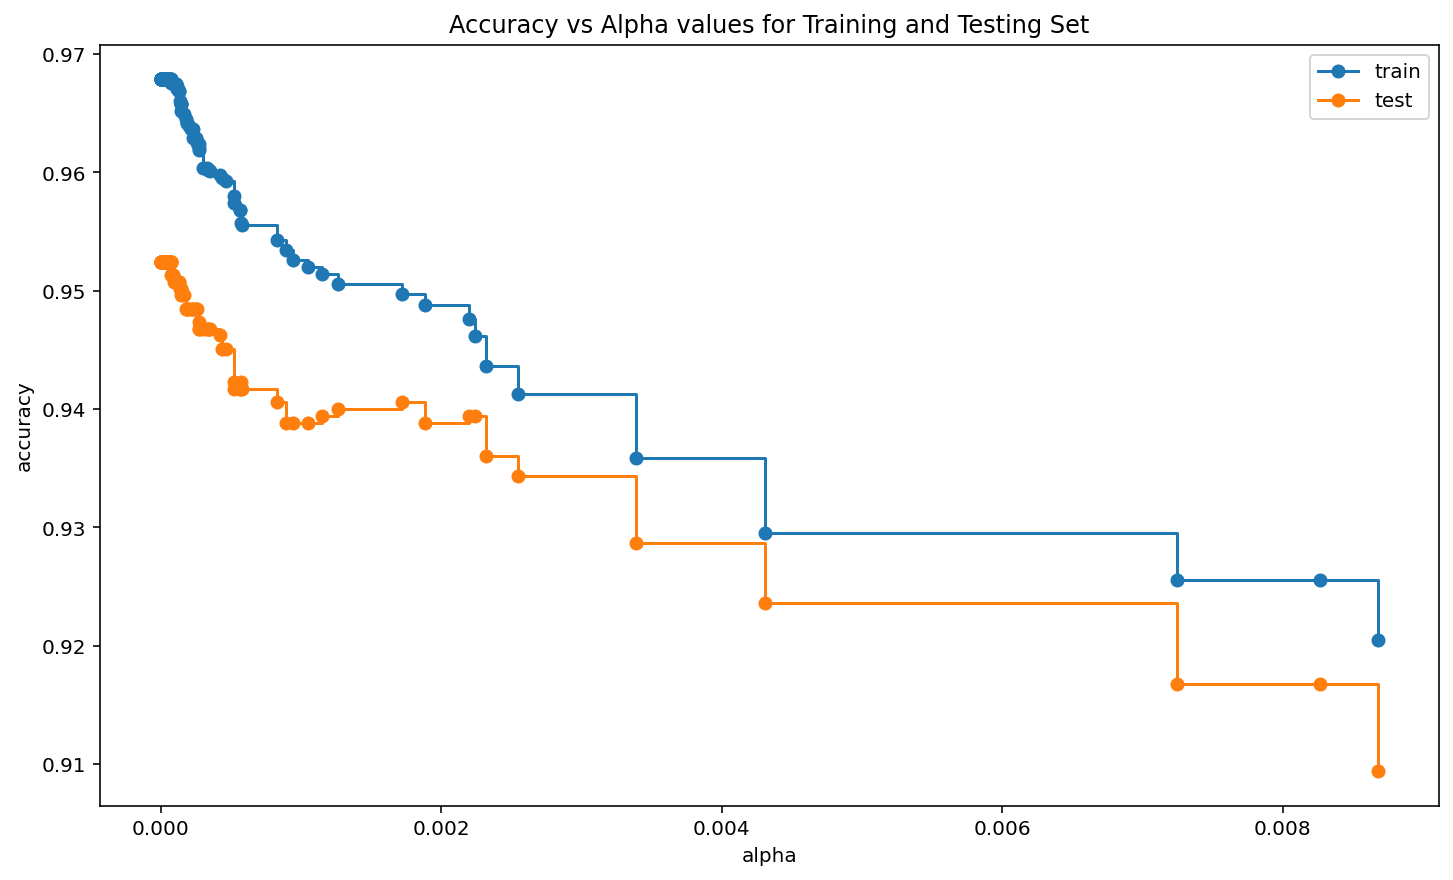

In [128]:
### Plot to show the accuracy scoer for the training and testing set

train_scores = [tree.score(x_train, y_train) for tree in tree_clfs]
test_scores = [tree.score(x_test, y_test) for tree in tree_clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha values for Training and Testing Set")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

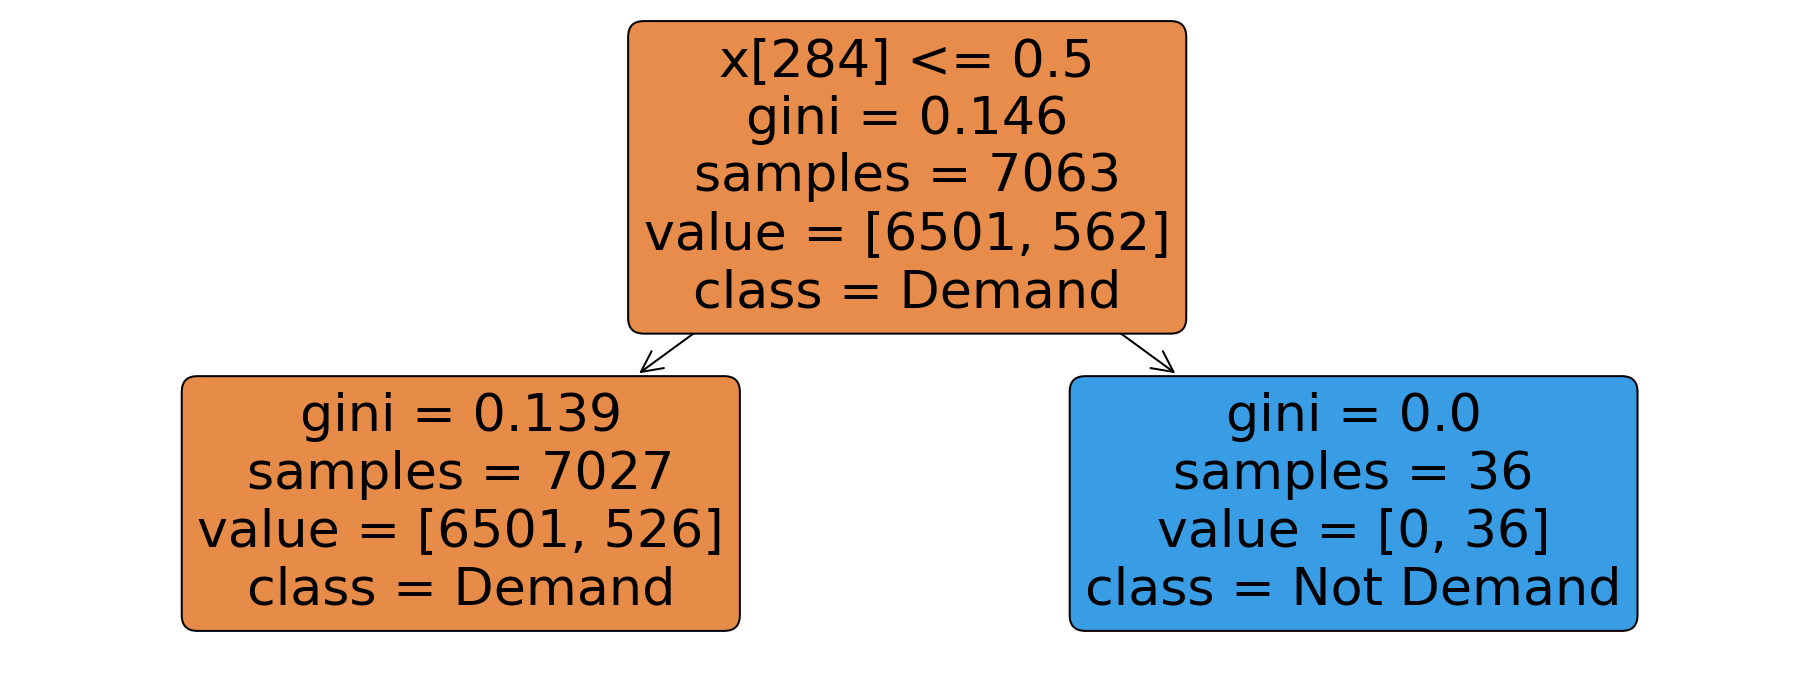

In [129]:
#DT - plot tree after pruning

from sklearn import tree

# result
tree_2=DecisionTreeClassifier(random_state=123, ccp_alpha=0.00868049)
tree_2.fit(x_train, y_train)
plt.figure(figsize=(16,6))
tree.plot_tree(tree_2, rounded=True, class_names = ['Demand','Not Demand'], filled=True)
plt.show()

AUC-ROC score value: 0.8078416874221669
Accuracy: 0.9524348810872028


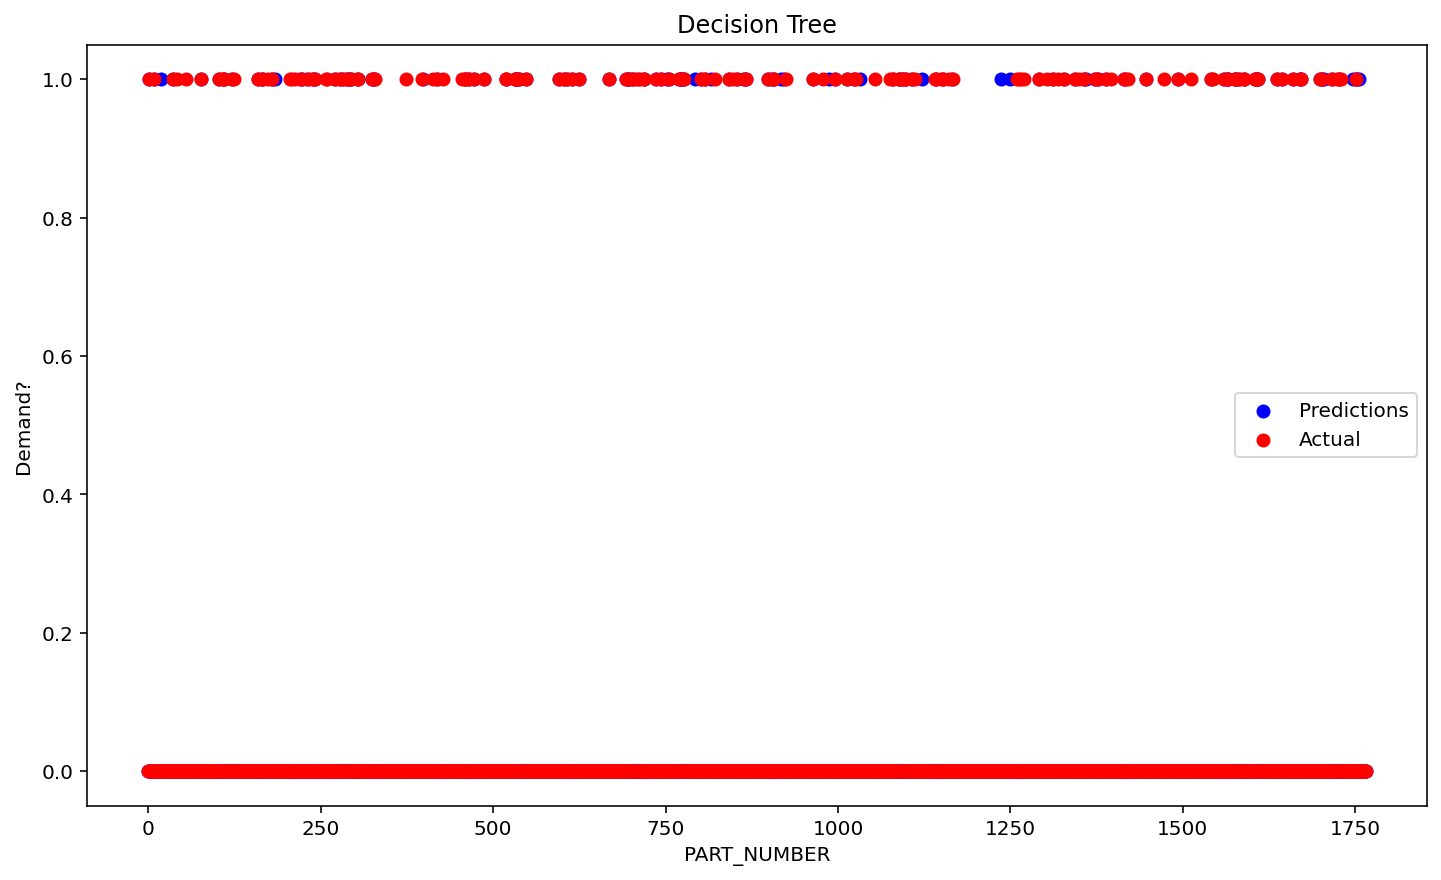

In [82]:

roc_score_tree = roc_auc_score(y_test, tree_predictions)
print("AUC-ROC score value:", roc_score_tree)
#Then finally, AUC-ROC score value, closer to 1 makes the system more accurate


# Calculate the accuracy of the model
tree_accuracy = accuracy_score(y_test, tree_predictions)
print("Accuracy:", tree_accuracy)


# Visualize the predictions
plt.scatter(range(len(tree_predictions)), tree_predictions, c="blue", label="Predictions")
plt.scatter(range(len(tree_predictions)), y_test, c="red", label="Actual")
plt.xlabel("PART_NUMBER")
plt.ylabel("Demand?")
plt.title("Decision Tree")
plt.legend()
plt.show()


[[1581   25]
 [  58  102]]
1766


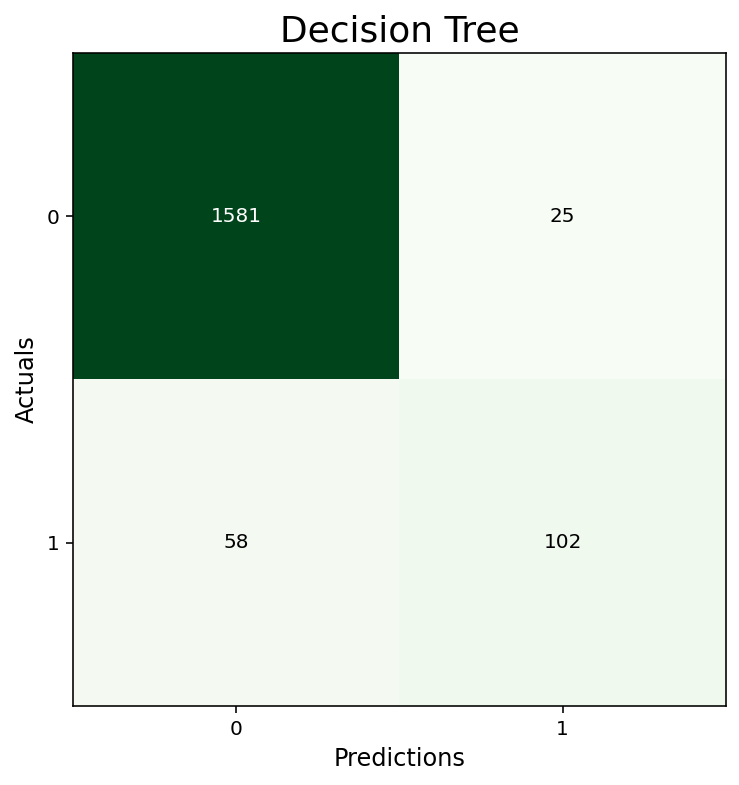

In [131]:
### Confusion Matrix


# Predict the demand for each PART_NUMBER using the testing data
tree_conf_matrix = confusion_matrix(y_test, tree_predictions)
print(tree_conf_matrix)
total_samples = np.sum(tree_conf_matrix)
print(total_samples)


#Visualizing confusion matrix for a better view,
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=tree_conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Decision Tree', fontsize=18)
plt.show()



In [133]:

#Overall metrics report of the logistic regression by Precision, Recall, F1 Score makes more understanding by how detailed our model predicts the data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Decision tree")


roc_score_tree = roc_auc_score(y_test, tree_predictions)
print("AUC-ROC score value:", roc_score_tree)
#Then finally, AUC-ROC score value, closer to 1 makes the system more accurate

tree_acc = accuracy_score(y_test, tree_predictions)
print("Accuracy:", tree_acc)

tree_ppv = precision_score(y_test, tree_predictions)
print("Precision:", tree_ppv)

tree_tpr = recall_score(y_test, tree_predictions)
print("Sensitivity:", tree_tpr)

tree_cm = confusion_matrix(y_test, tree_predictions)
tree_TN = tree_cm[0, 0]
tree_FP = tree_cm[0, 1]
tree_tnr = tree_TN / (tree_TN + tree_FP)
print("Specificity:", tree_tnr)

tree_f_score = f1_score(y_test, tree_predictions)
print("F score:", tree_f_score)

print(metrics.classification_report(y_test, tree_predictions))


Decision tree
AUC-ROC score value: 0.8109666874221669
Accuracy: 0.9530011325028312
Precision: 0.8031496062992126
Sensitivity: 0.6375
Specificity: 0.9844333748443338
F score: 0.7108013937282229
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1606
           1       0.80      0.64      0.71       160

    accuracy                           0.95      1766
   macro avg       0.88      0.81      0.84      1766
weighted avg       0.95      0.95      0.95      1766



#### ALL THREE MODELS \- Plot of accuracy comparison



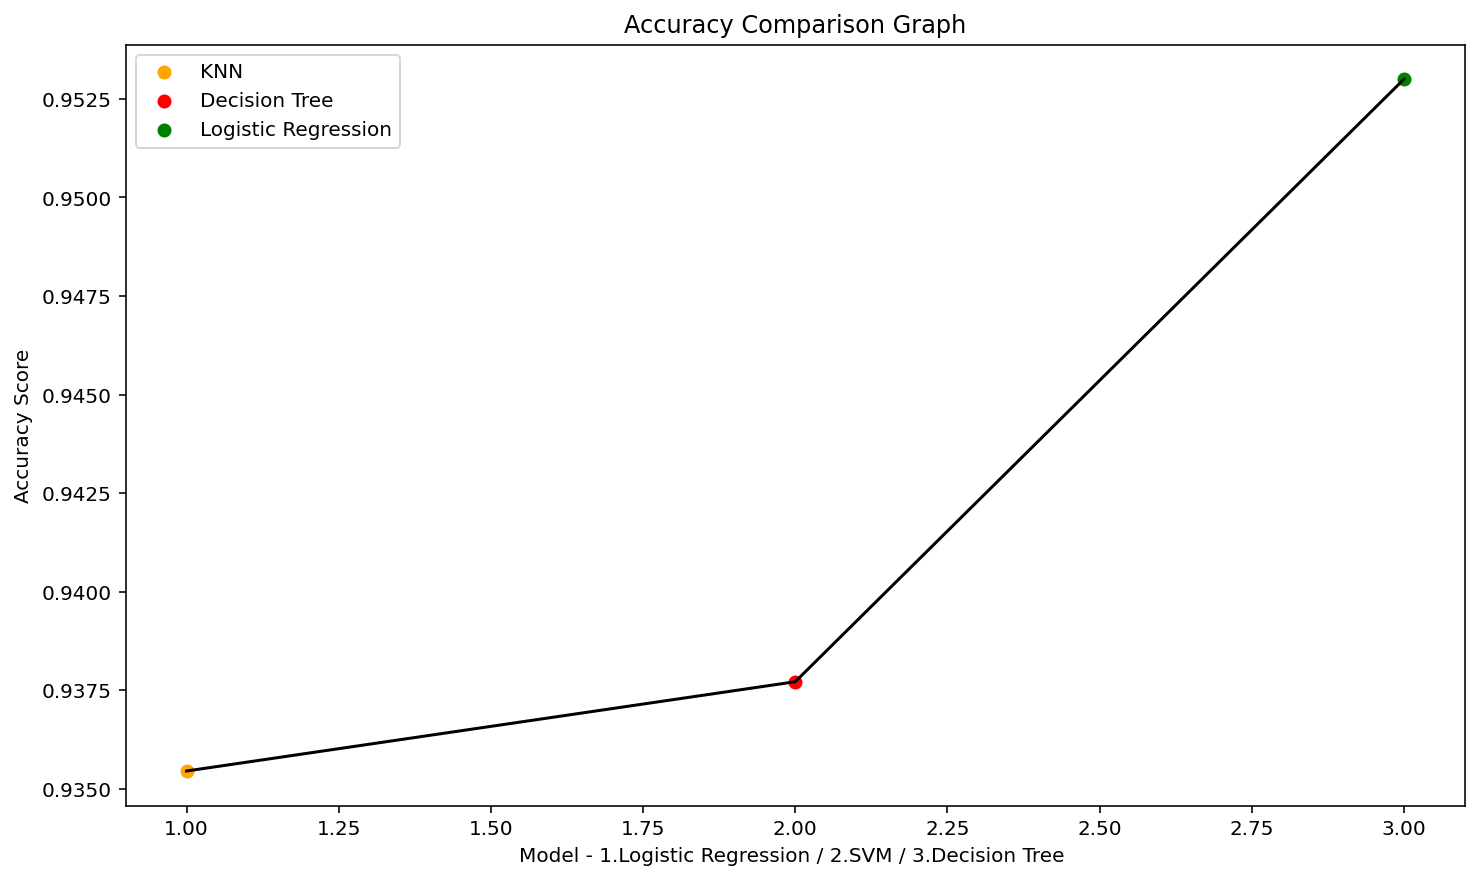

In [135]:
### Plot the accuracy of three models

plt.title("Accuracy Comparison Graph")
plt.ylabel("Accuracy Score")

plt.xlabel("Model - 1.Logistic Regression / 2.SVM / 3.Decision Tree ")

y = [lr_acc, svm_acc, tree_acc]

plt.plot([1,2,3],y, color = "black")


plt.scatter(1,lr_acc, marker="o", color = "orange",label = "KNN")

plt.scatter(2,svm_acc, marker="o", color="red", label="Decision Tree")

plt.scatter(3,tree_acc, marker="o", color="green", label="Logistic Regression")



 
plt.legend()
plt.show()

#### ALL THREE MODELS \- Plot of confusion matrix



In [0]:



###LR
headmap_LR =sns.heatmap(lr_conf_matrix/np.sum(lr_conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

headmap_LR.set_title('Logistic Regression')


###SVM
headmap_SVM = sns.heatmap(svm_conf_matrix/np.sum(svm_conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
headmap_SVM.set_title('SVM')

###DT
heatmap_DT = sns.heatmap(tree_conf_matrix/np.sum(tree_conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
heatmap_DT.set_title('Decision Tree')

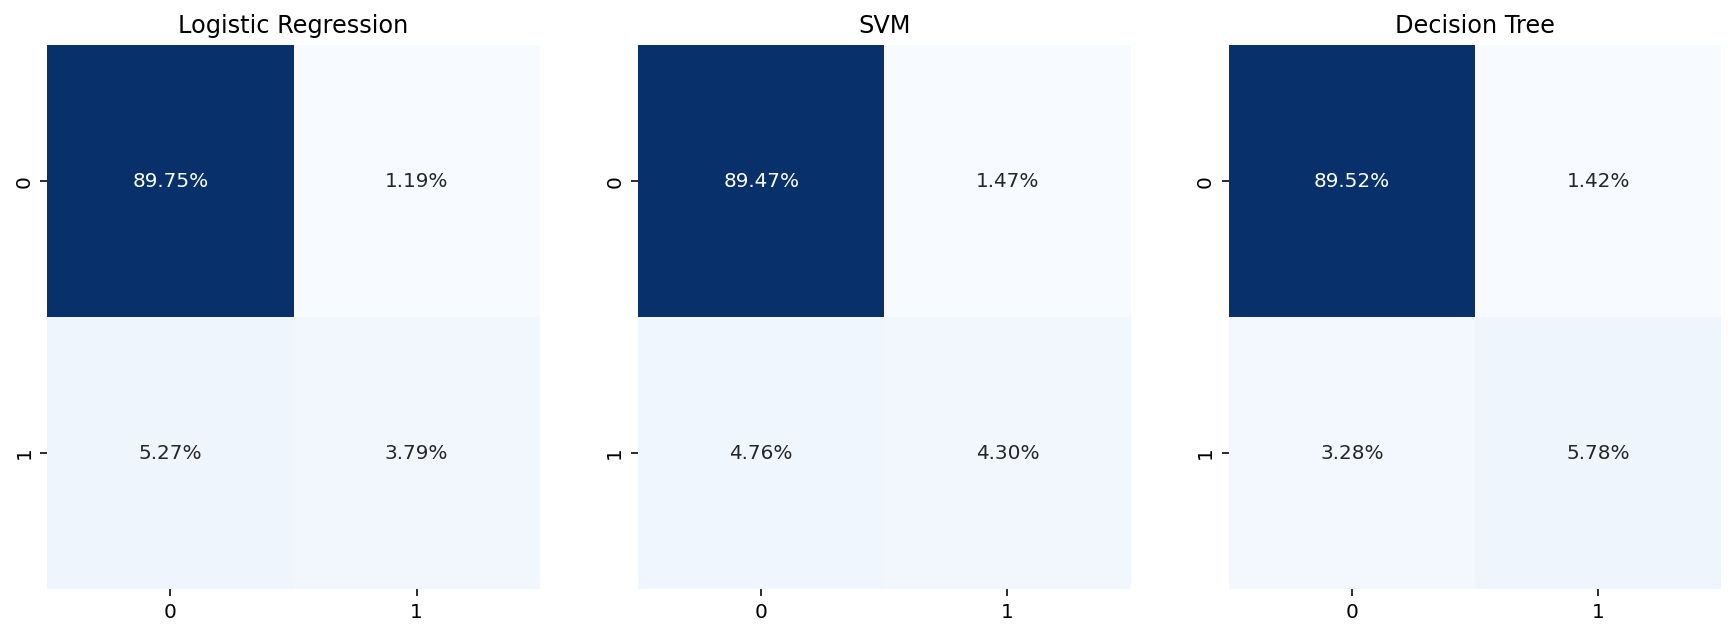

In [152]:
# Create a grid of subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first heatmap in the first subplot
sns.heatmap(lr_conf_matrix/np.sum(lr_conf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=axs[0], cbar=False)
axs[0].set_title('Logistic Regression')

# Plot the second heatmap in the second subplot
sns.heatmap(svm_conf_matrix/np.sum(svm_conf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=axs[1], cbar=False)
axs[1].set_title('SVM')

# Plot the third heatmap in the third subplot
sns.heatmap(tree_conf_matrix/np.sum(tree_conf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=axs[2], cbar=False)
axs[2].set_title('Decision Tree')

# Display the plots
plt.show()